## Modelling

In [1]:
# Loading libraries
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# Loading CSV file of preprocessed data
happy_df = pd.read_csv('happy.csv')

In [3]:
# Creating copies to protect original df
dfv1 = happy_df.copy()
dfv2 = happy_df.copy()
dfv3 = happy_df.copy()
dfv4 = happy_df.copy()
dfv5 = happy_df.copy()
dfv6 = happy_df.copy()
dfv7 = happy_df.copy()

In [4]:
# Create my variables
X = dfv1.iloc[:, 1:-1].values
y = dfv1.iloc[:, -1].values # happiness_s

In [5]:
X.shape,y.shape

((1745, 16), (1745,))

In [6]:
# Features and target columns
dfv1.iloc[:,1:-1].columns

Index(['year', 'log_gdp', 'social_s', 'life_ex', 'life_choices', 'generosity',
       'corruption', 'positive_a', 'negative_a', 'population', 'spirit_c',
       'wine_c', 'beer_c', 'forest_c', 'u_pop', 'age_dr'],
      dtype='object')

In [7]:
# Importing train, test, split from sklearn
# Applying an 80/20 split between train and test size
# Setting random state 8, to be kept consistent through the whole process

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,
                                                    random_state=8)

There is an ongoing debate over which data and when it must be standardised on the internet. Through our research, we have concluded that features should be standardised after splitting our data. Thus, we will be scaling our train variables to make sure they all take the values on the same scale in order to prevent one predictor from dominating the other. The test variable won't be standardised because that's data that should be unknown to our model beforehand (information leakage).

In [8]:
# Importing and instantiating StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [9]:
# Applying StandardScaler
X_train = sc.fit_transform(X_train)

In [10]:
X_test = sc.transform(X_test)

From our EDA, it has become apparent that our data has moderate collinearity and therefore we would predict a Ridge model to provide us with a more accurate prediction and a lower error when compared to the other models.

### Linear Regression (lr)

In [11]:
# Instantiating the linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [12]:
# Train the Model
lr.fit(X_train, y_train)

LinearRegression()

#### Predicting our Results

In [13]:
y_pred = lr.predict(X_test)
np.set_printoptions(precision=2) # rounding numbers to two decimals

In [14]:
y_pred = lr.predict(X_test)
np.set_printoptions(precision=2)

# Printing list with prediction to the left and real value to the right
print(np.concatenate((y_pred.reshape(len(y_pred),1),
                      y_test.reshape(len(y_test),1)), 1))

[[5.25 4.59]
 [6.58 6.63]
 [5.43 5.08]
 [5.21 4.21]
 [5.13 4.03]
 [6.52 6.24]
 [4.42 3.06]
 [5.49 4.72]
 [4.44 5.07]
 [7.29 7.34]
 [4.03 4.06]
 [5.01 4.91]
 [2.98 2.94]
 [6.44 6.46]
 [5.52 5.65]
 [5.36 5.6 ]
 [3.82 3.62]
 [5.88 5.88]
 [4.38 3.7 ]
 [5.18 5.17]
 [6.14 5.65]
 [6.88 7.07]
 [6.11 6.11]
 [4.85 4.61]
 [6.32 7.14]
 [5.1  4.83]
 [5.11 4.96]
 [3.73 3.67]
 [6.85 7.13]
 [4.51 3.48]
 [5.38 5.12]
 [6.55 6.58]
 [5.23 5.62]
 [3.5  4.03]
 [5.04 4.8 ]
 [4.61 4.31]
 [4.71 3.48]
 [5.82 5.49]
 [4.65 4.59]
 [4.84 4.97]
 [7.1  6.96]
 [4.01 3.41]
 [6.96 7.11]
 [4.43 4.18]
 [5.65 5.78]
 [7.21 7.68]
 [5.44 5.18]
 [6.84 6.61]
 [3.99 3.73]
 [4.95 4.48]
 [6.72 7.09]
 [4.06 4.  ]
 [5.42 4.88]
 [3.19 4.14]
 [5.74 6.15]
 [3.89 3.96]
 [5.99 5.79]
 [6.1  6.17]
 [6.4  7.07]
 [5.42 6.02]
 [4.7  4.41]
 [4.52 4.68]
 [5.23 5.46]
 [6.05 6.52]
 [4.88 3.97]
 [5.24 5.22]
 [5.69 5.71]
 [3.73 3.17]
 [7.07 6.9 ]
 [4.37 4.97]
 [6.02 5.22]
 [4.47 3.68]
 [6.79 6.38]
 [5.89 6.7 ]
 [5.69 6.46]
 [6.4  6.17]
 [5.21 3.88]

In [15]:
from sklearn.model_selection import cross_val_score
# get cross validated scores
lr_cvs = cross_val_score(lr, X_train, y_train, cv=5)
print("Cross-validated training scores:", lr_cvs)
print("Mean cross-validated training score:", lr_cvs.mean())

# fit and evaluate the data on the whole training set
lr.fit(X_train, y_train)
lr_train = lr.score(X_train, y_train)
print("Training Score:", lr_train)

# evaluate the data on the test set
print("Test Score:", lr.score(X_test, y_test))

lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE Score:', lr_rmse)

Cross-validated training scores: [0.8  0.75 0.79 0.78 0.75]
Mean cross-validated training score: 0.7747893196165974
Training Score: 0.7842806261667987
Test Score: 0.7914009903297992
RMSE Score: 0.5126514409740867


In [16]:
lr.coef_

array([-0.06,  0.31,  0.19,  0.24,  0.1 ,  0.11, -0.07,  0.18, -0.03,
        0.01, -0.07,  0.  ,  0.1 , -0.04,  0.19,  0.08])

### Ridge

In [17]:
# Creating features and target for Ridge
Xr = dfv1.iloc[:, 1:-1].values
yr = dfv1.iloc[:, -1].values

In [18]:
# Importing train, test, split from sklearn
# Applying an 80/20 split between train and test size
# Setting random state 8, to be kept consistent through the whole process

from sklearn.model_selection import train_test_split
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, 
                                                    test_size = 0.2,
                                                    random_state=8)

In [19]:
# Scaling my data
Xr_train = sc.fit_transform(Xr_train)

In [20]:
Xr_test = sc.transform(Xr_test)

In [21]:
# Importing Ridge Module
from sklearn.linear_model import Ridge,RidgeCV

# create a Ridge model instance
ridge = Ridge(alpha=1)

In [22]:
# Fit Ridge
ridge.fit(Xr_train,yr_train)

Ridge(alpha=1)

In [23]:
# Predict
yr_pred = ridge.predict(Xr_test)
np.set_printoptions(precision=2) # rounding numbers to two decimals

In [24]:
# get cross validated scores
r_cvs = cross_val_score(ridge, Xr_train, yr_train, cv=5)
print("Cross-validated training scores:", r_cvs)
print("Mean cross-validated training score:", r_cvs.mean())

# fit and evaluate the data on the whole training set
ridge.fit(Xr_train, yr_train)
print("Training Score:", ridge.score(Xr_train, yr_train))

# evaluate the data on the test set
print("Test Score:", ridge.score(Xr_test, yr_test))

r_rmse = np.sqrt(mean_squared_error(yr_test, yr_pred))
print('RMSE Score:', r_rmse)

Cross-validated training scores: [0.8  0.75 0.79 0.78 0.75]
Mean cross-validated training score: 0.7748084399273351
Training Score: 0.7842803740776076
Test Score: 0.791375803072494
RMSE Score: 0.5126823900519912


<div class="alert alert-block alert-warning">
<b>Ridge:</b> Ridge, reducing collinearity by shrinking coefficients does not have an impact on our 15 features. (lr test score .7848, RMSE 0.5208).
</div>

In [25]:
lr.coef_,ridge.coef_

(array([-0.06,  0.31,  0.19,  0.24,  0.1 ,  0.11, -0.07,  0.18, -0.03,
         0.01, -0.07,  0.  ,  0.1 , -0.04,  0.19,  0.08]),
 array([-0.06,  0.31,  0.19,  0.24,  0.1 ,  0.11, -0.07,  0.18, -0.03,
         0.01, -0.07,  0.  ,  0.1 , -0.04,  0.19,  0.08]))

### Lasso

In [26]:
# Create features and target
Xl = dfv1.iloc[:, 1:-1].values
yl = dfv1.iloc[:, -1].values

In [27]:
# Importing train, test, split
from sklearn.model_selection import train_test_split
Xl_train, Xl_test, yl_train, yl_test = train_test_split(Xl, yl, 
                                                    test_size = 0.2,
                                                    random_state=8)

In [28]:
# Scale data
Xl_train = sc.fit_transform(Xl_train)

In [29]:
Xl_test = sc.transform(Xl_test)

In [30]:
# Import Lasso
from sklearn.linear_model import Lasso

# create a Lasso model instance
lasso = Lasso(alpha=0.1)

In [31]:
# Fit Lasso
lasso.fit(Xl_train,yl_train)

Lasso(alpha=0.1)

In [32]:
# Predict
yl_pred = lasso.predict(Xl_test)
np.set_printoptions(precision=2) # rounding numbers to two decimals

In [33]:
# get cross validated scores
l_cvs = cross_val_score(lasso, Xl_train, yl_train, cv=5)
print("Cross-validated training scores:", l_cvs)
print("Mean cross-validated training score:", l_cvs.mean())

# fit and evaluate the data on the whole training set
lasso.fit(Xl_train, yl_train)
print("Training Score:", lasso.score(Xl_train, yl_train))

# evaluate the data on the test set
print("Test Score:", lasso.score(Xl_test, yl_test))

l_rmse = np.sqrt(mean_squared_error(yl_test, yl_pred))
print('RMSE Score:', l_rmse)

Cross-validated training scores: [0.76 0.74 0.77 0.76 0.72]
Mean cross-validated training score: 0.7480520720055104
Training Score: 0.753830831152399
Test Score: 0.7618385504523588
RMSE Score: 0.5477744781320912


<div class="alert alert-block alert-warning">
<b>Lasso </b> is more favourable with very large selection of features (e.g. 10k), because it does the feature selection for us. However, the results are <u>below linear and ridge regression</u>. The reason for this is that Lasso will set correlated variables to zero, and therefore because of loss of data, it has the potential to impact the R2 score.
</div>

In [34]:
lr.coef_,ridge.coef_, lasso.coef_

(array([-0.06,  0.31,  0.19,  0.24,  0.1 ,  0.11, -0.07,  0.18, -0.03,
         0.01, -0.07,  0.  ,  0.1 , -0.04,  0.19,  0.08]),
 array([-0.06,  0.31,  0.19,  0.24,  0.1 ,  0.11, -0.07,  0.18, -0.03,
         0.01, -0.07,  0.  ,  0.1 , -0.04,  0.19,  0.08]),
 array([-0.  ,  0.36,  0.18,  0.15,  0.06,  0.02, -0.07,  0.19, -0.  ,
        -0.  , -0.  ,  0.  ,  0.  ,  0.  ,  0.1 , -0.  ]))

Let us explore if we can improve our scores by using more complex models in an attempt to <code style="background:orange;color:black">escape the feature importance trap.</code>

### Decision Tree Regression

In [35]:
# Creating features and target variable
Xdtr = dfv4.iloc[:, 1:-1].values
ydtr = dfv4.iloc[:, -1].values

In [36]:
# Importing train, test, split
from sklearn.model_selection import train_test_split
Xdtr_train, Xdtr_test, ydtr_train, ydtr_test = train_test_split(Xdtr, ydtr, 
                                                    test_size = 0.2,
                                                    random_state=8)

In [37]:
# Standardising variables
Xdtr_train = sc.fit_transform(Xdtr_train)

In [38]:
Xdtr_test = sc.transform(Xdtr_test)

In [39]:
# Train the Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 8)
dtr.fit(Xdtr_train, ydtr_train)

DecisionTreeRegressor(random_state=8)

In [40]:
# Predict
ydtr_pred = dtr.predict(Xdtr_test)
np.set_printoptions(precision=2)

In [41]:
# get cross validated scores
dtr_cvs = cross_val_score(dtr, Xdtr_train, ydtr_train, cv=5)
print("Cross-validated training scores:", dtr_cvs)
print("Mean cross-validated training score:", dtr_cvs.mean())

# fit and evaluate the data on the whole training set
dtr.fit(Xdtr_train, ydtr_train)
print("Training Score:", dtr.score(Xdtr_train, ydtr_train))

# evaluate the data on the test set
print("Test Score:", dtr.score(Xdtr_test, ydtr_test))

dtr_rmse = np.sqrt(mean_squared_error(ydtr_test, ydtr_pred))
print('RMSE Score:', dtr_rmse)

Cross-validated training scores: [0.77 0.79 0.79 0.76 0.71]
Mean cross-validated training score: 0.7646358741626942
Training Score: 1.0
Test Score: 0.8191289117463654
RMSE Score: 0.47736506967112746


<div class="alert alert-block alert-success">
Our Decision Tree <b>improves our score by over 2%</b>. The model improves our score, because it manages collinearity better and doesn't make assumptions about how our data is distributed <u>(non-parametric).</u>
</div>

### Random Forest Regression

In [42]:
# Defining our target and predictors
Xrf = dfv5.iloc[:, 1:-1].values
yrf = dfv5.iloc[:, -1].values

In [43]:
# Importing train, test, split
from sklearn.model_selection import train_test_split
Xrf_train, Xrf_test, yrf_train, yrf_test = train_test_split(Xrf, yrf, 
                                                    test_size = 0.2,
                                                    random_state=8)

In [44]:
# Scaling data
Xrf_train = sc.fit_transform(Xrf_train)

In [45]:
Xrf_test = sc.transform(Xrf_test)

In [46]:
# Train the Random Forest Regression Regression Model
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100,
                                  random_state = 8)
rfr.fit(Xrf_train, yrf_train)

RandomForestRegressor(random_state=8)

In [47]:
# Predict
yrf_pred = rfr.predict(Xrf_test)
np.set_printoptions(precision=2)

In [48]:
# get cross validated scores
rfr_cvs = cross_val_score(rfr, Xrf_train, yrf_train, cv=5)
print("Cross-validated training scores:", rfr_cvs)
print("Mean cross-validated training score:", rfr_cvs.mean())

# fit and evaluate the data on the whole training set
rfr.fit(Xrf_train, yrf_train)
print("Training Score:", rfr.score(Xrf_train, yrf_train))

# evaluate the data on the test set
print("Test Score:", rfr.score(Xrf_test, yrf_test))

rfr_rmse = np.sqrt(mean_squared_error(yrf_test, yrf_pred))
print('RMSE Score:', rfr_rmse )

Cross-validated training scores: [0.88 0.87 0.91 0.88 0.88]
Mean cross-validated training score: 0.8851547097370991
Training Score: 0.9862772370374947
Test Score: 0.9040675638217851
RMSE Score: 0.3476552547059251


<div class="alert alert-block alert-success">
Random Forest leverages the power of multiple decision trees and thereby <u> reduces overfitting.</u> This results in <b>the best model so far</b>.   
</div>

### Results Overview

In [49]:
# Creating performance dataframe for each model
performance_data = {'model': ["Linear Regression", "Ridge", "Lasso",
                              "Decision Tree", "Random Forest"],
        'short_name': ["lr", "ridge", "lasso", "dtr", "rfr"],
        'cv_score(avg)': [lr_cvs.mean(), r_cvs.mean(),l_cvs.mean(),
                          dtr_cvs.mean(),rfr_cvs.mean()],
        'training_score': [lr_train,ridge.score(Xr_train, yr_train),
                           lasso.score(Xl_train, yl_train),
                           dtr.score(Xdtr_train, ydtr_train),
                           rfr.score(Xrf_train, yrf_train)],
        'test_score': [lr.score(X_test, y_test),ridge.score(Xr_test, yr_test),
                       lasso.score(Xl_test, yl_test),
                       dtr.score(Xdtr_test, ydtr_test),rfr.score(Xrf_test, yrf_test)],
        'rmse_score': [lr_rmse, r_rmse, l_rmse, dtr_rmse, rfr_rmse]
        }
performance_df = pd.DataFrame(data=performance_data)

performance_df

,model,short_name,cv_score(avg),training_score,test_score,rmse_score
0,Linear Regression,lr,0.774789,0.784281,0.791401,0.512651
1,Ridge,ridge,0.774808,0.784280,0.791376,0.512682
2,Lasso,lasso,0.748052,0.753831,0.761839,0.547774
3,Decision Tree,dtr,0.764636,1.000000,0.819129,0.477365
4,Random Forest,rfr,0.885155,0.986277,0.904068,0.347655


In [50]:
# Export dataframe as png
import dataframe_image as dfi
dfi.export(performance_df,'performance_df.png')

[0314/203047.339775:INFO:headless_shell.cc(659)] Written to file /var/folders/b2/wsl4pn8x4lz_9scydxm8jkkm0000gn/T/tmphs535rlg/temp.png.


<div class="alert alert-block alert-info">
<b>Evaluating our first results</b>

Judging from our <u>training scores</u> Decision Tree and Random Forest are overfitting our data. 

However, when <u>cross validating</u> our scores while training our data, the cv scores are relatively close to our test scores.

Looking at the <u>standard deviation of the residuals</u> (RMSE), the lowest value of prediction error is clearly associated with our Random Forest model.
    
</div>

#### Visualising the Results of our first five models

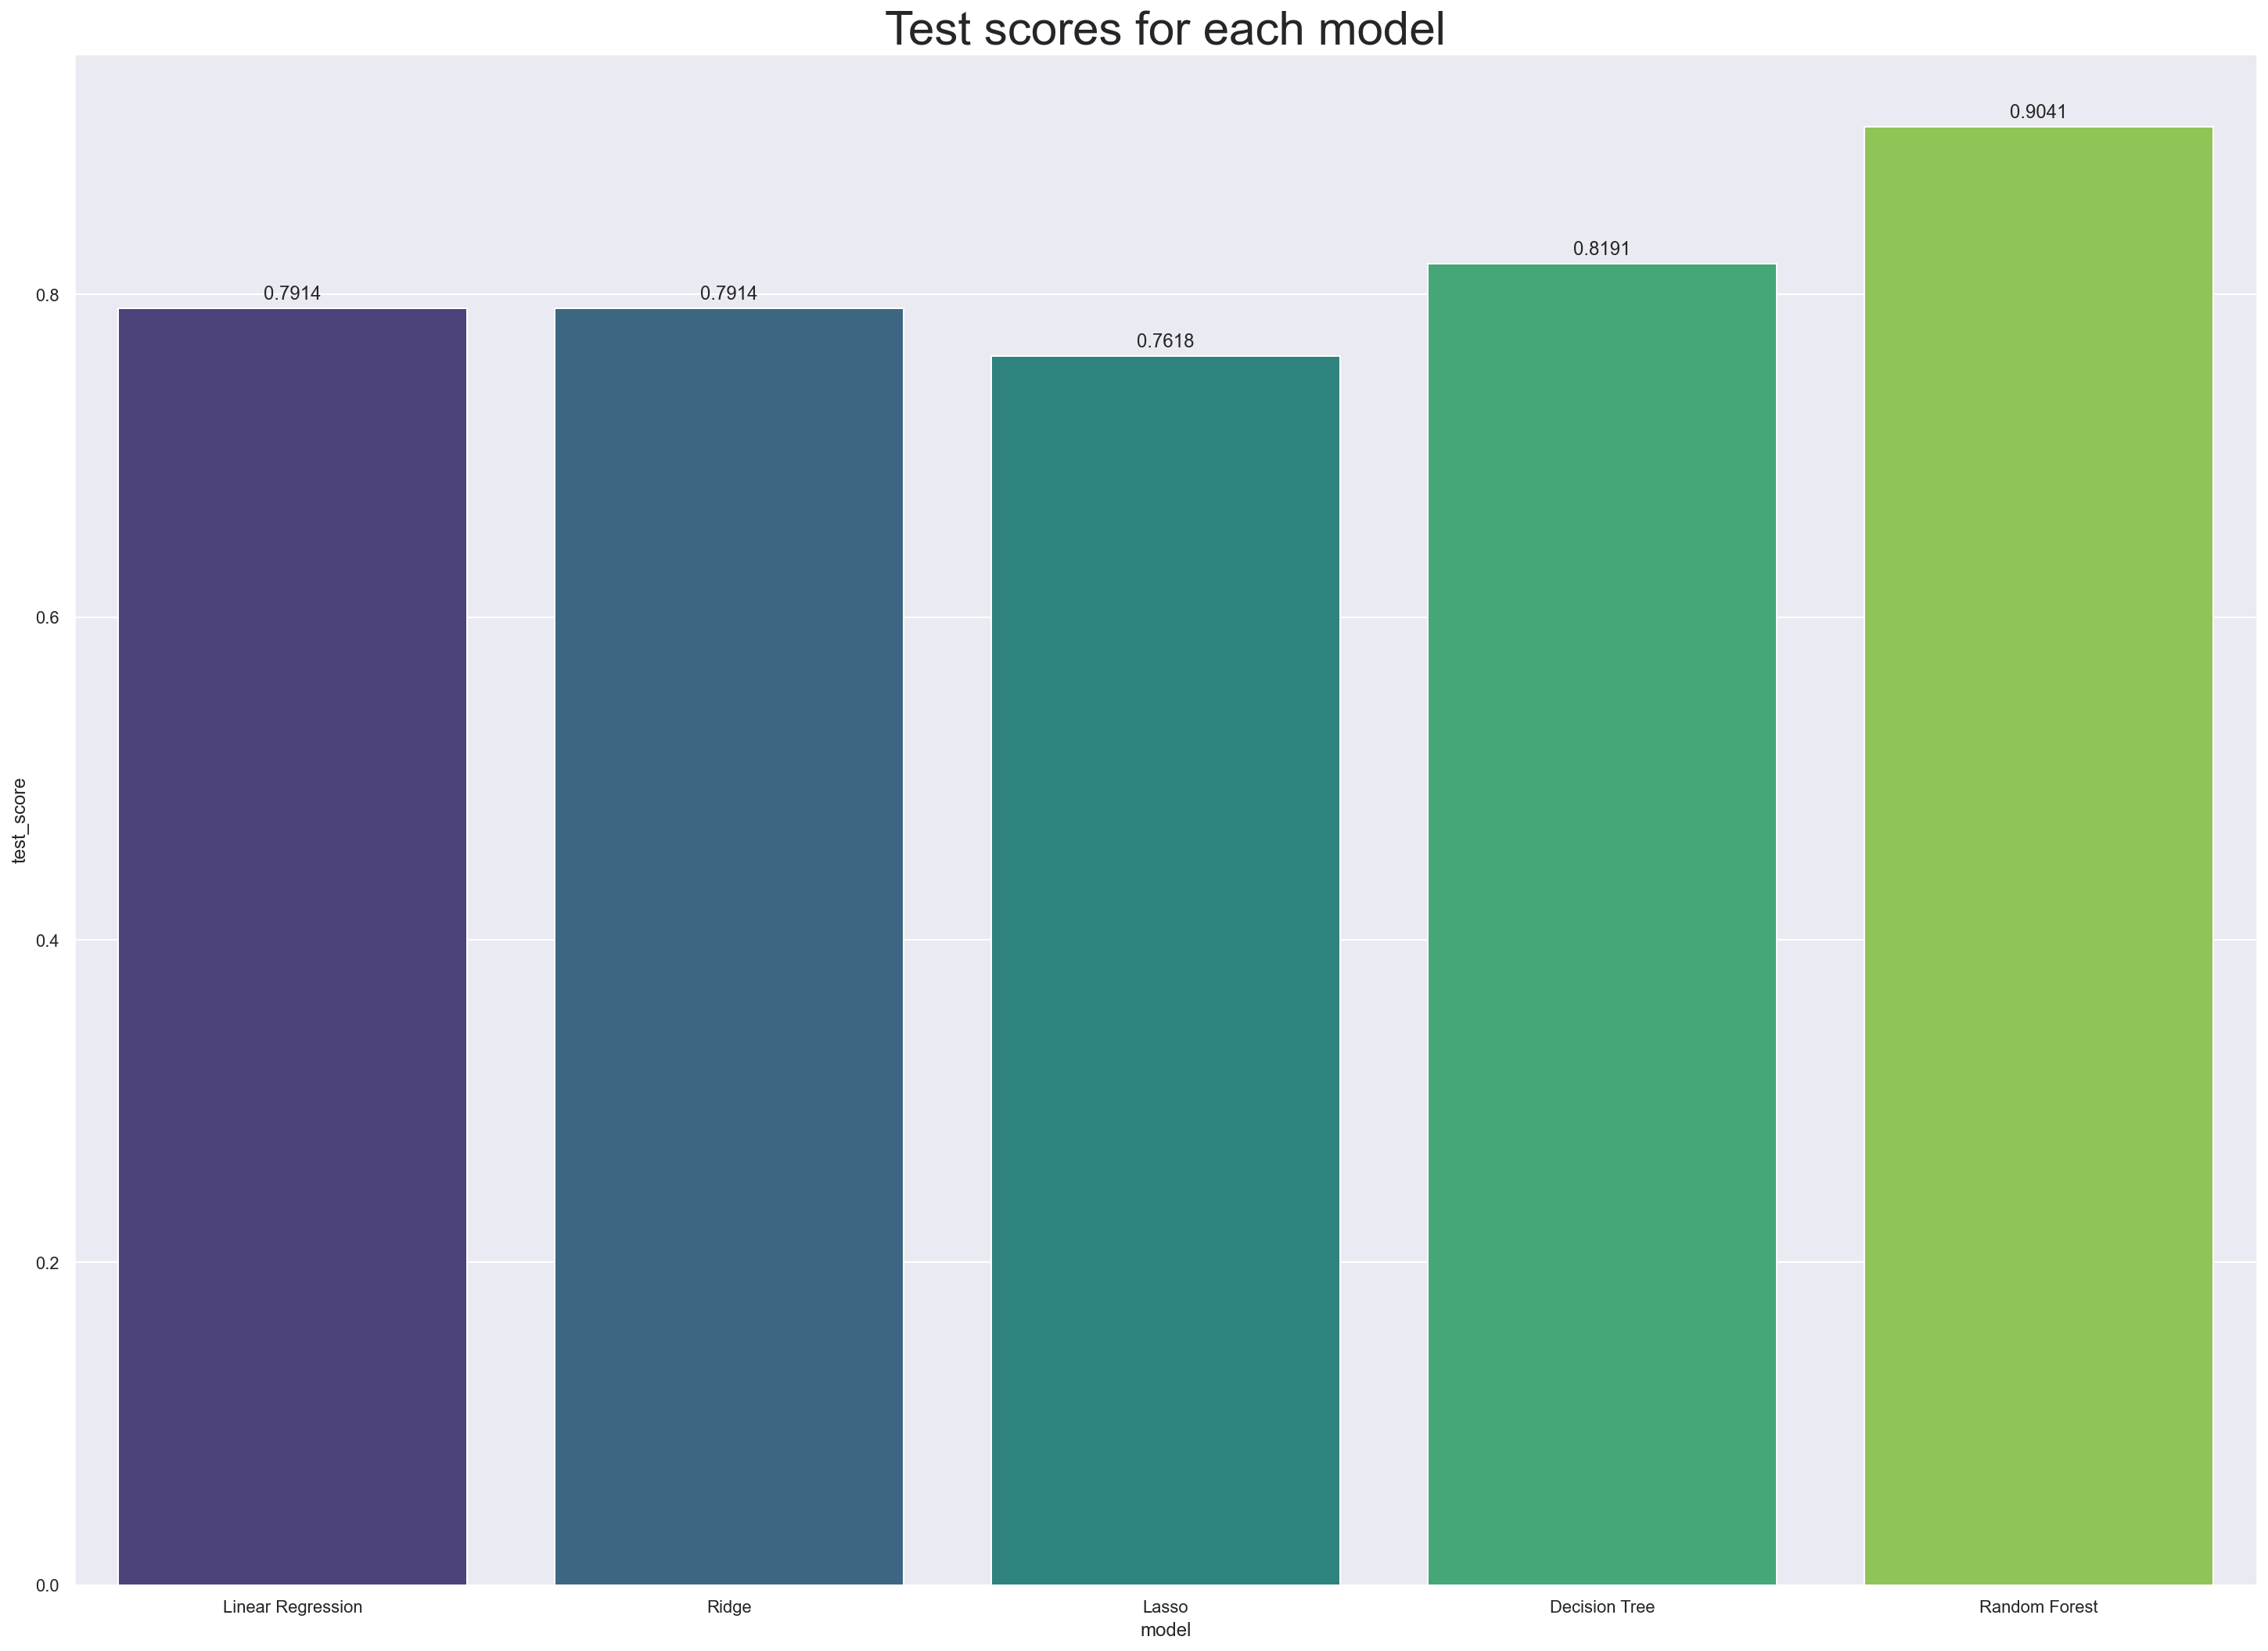

In [51]:
# Creating a boxplot to display the test score
sns.set(rc= {'figure.figsize':(25,18)})
ax = sns.barplot(x='model', y='test_score', data=performance_df, palette="viridis")

# Annotate Bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.axes.set_title("Test scores for each model", fontsize=30)
plt.show()

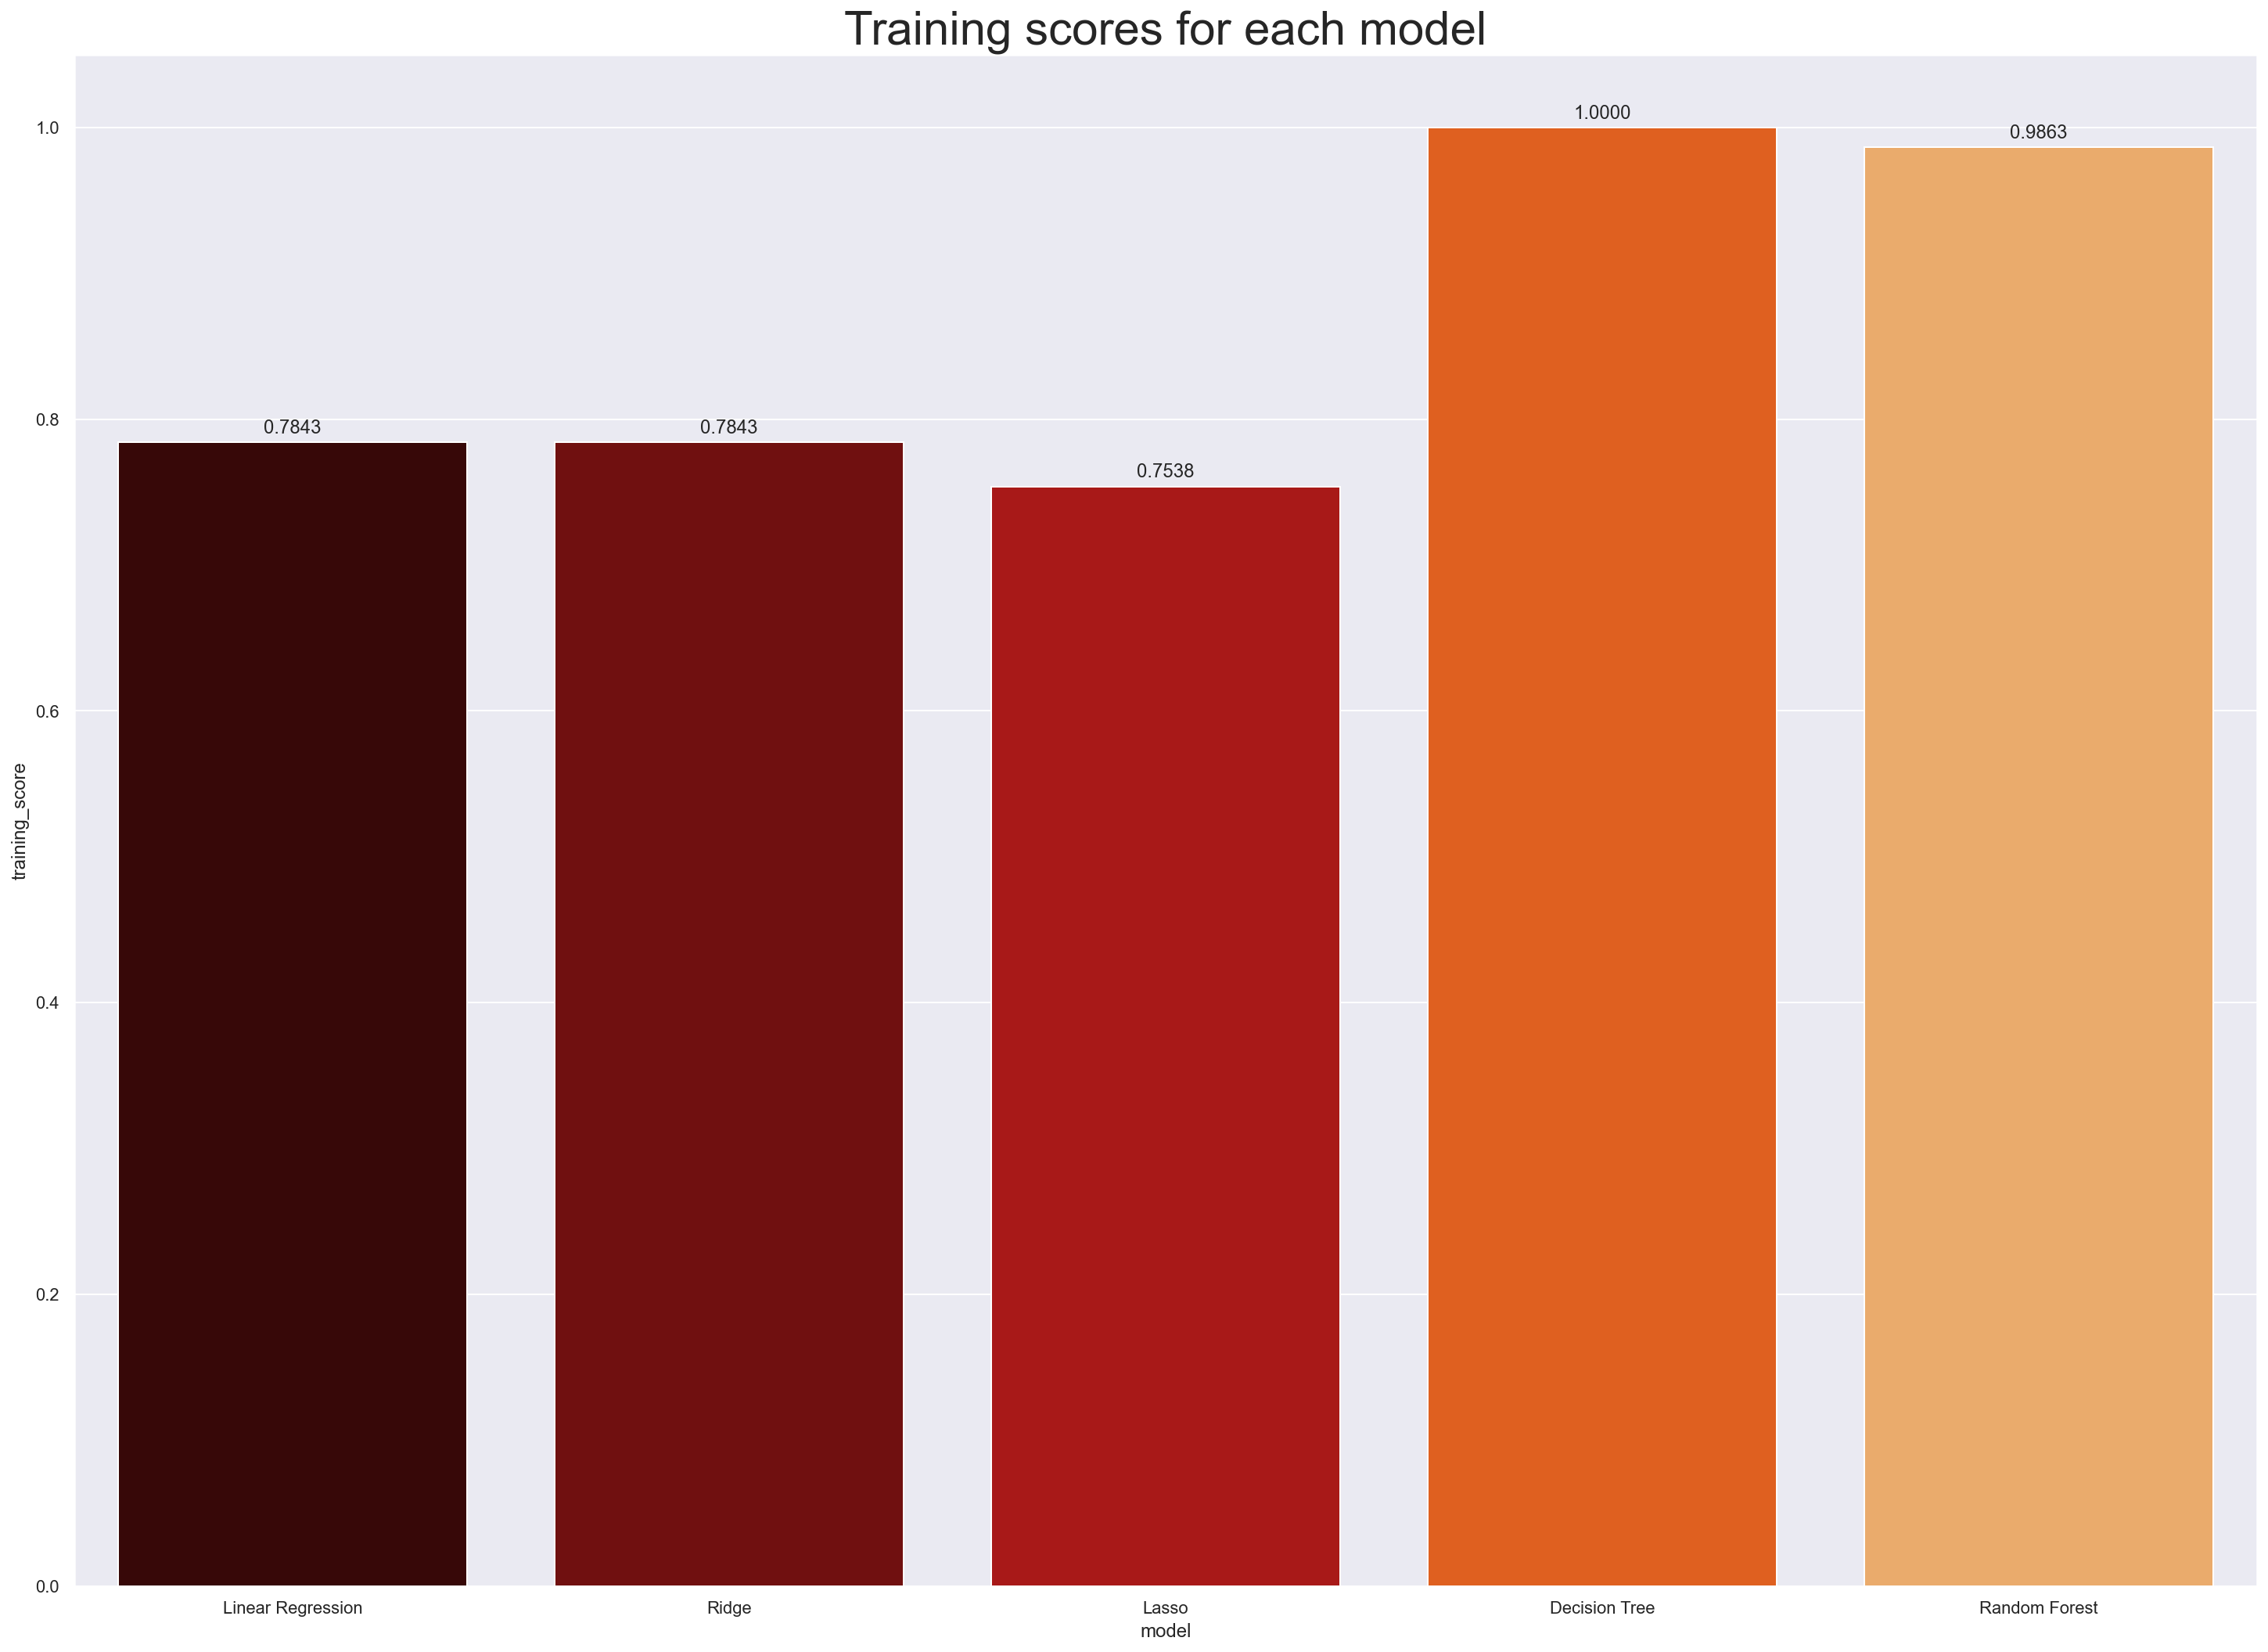

In [52]:
# Creating a boxplot to display the training score for each model
ax = sns.barplot(x='model', y='training_score', data=performance_df, palette="gist_heat")

# Annotate Bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.axes.set_title("Training scores for each model", fontsize=30)
plt.show()

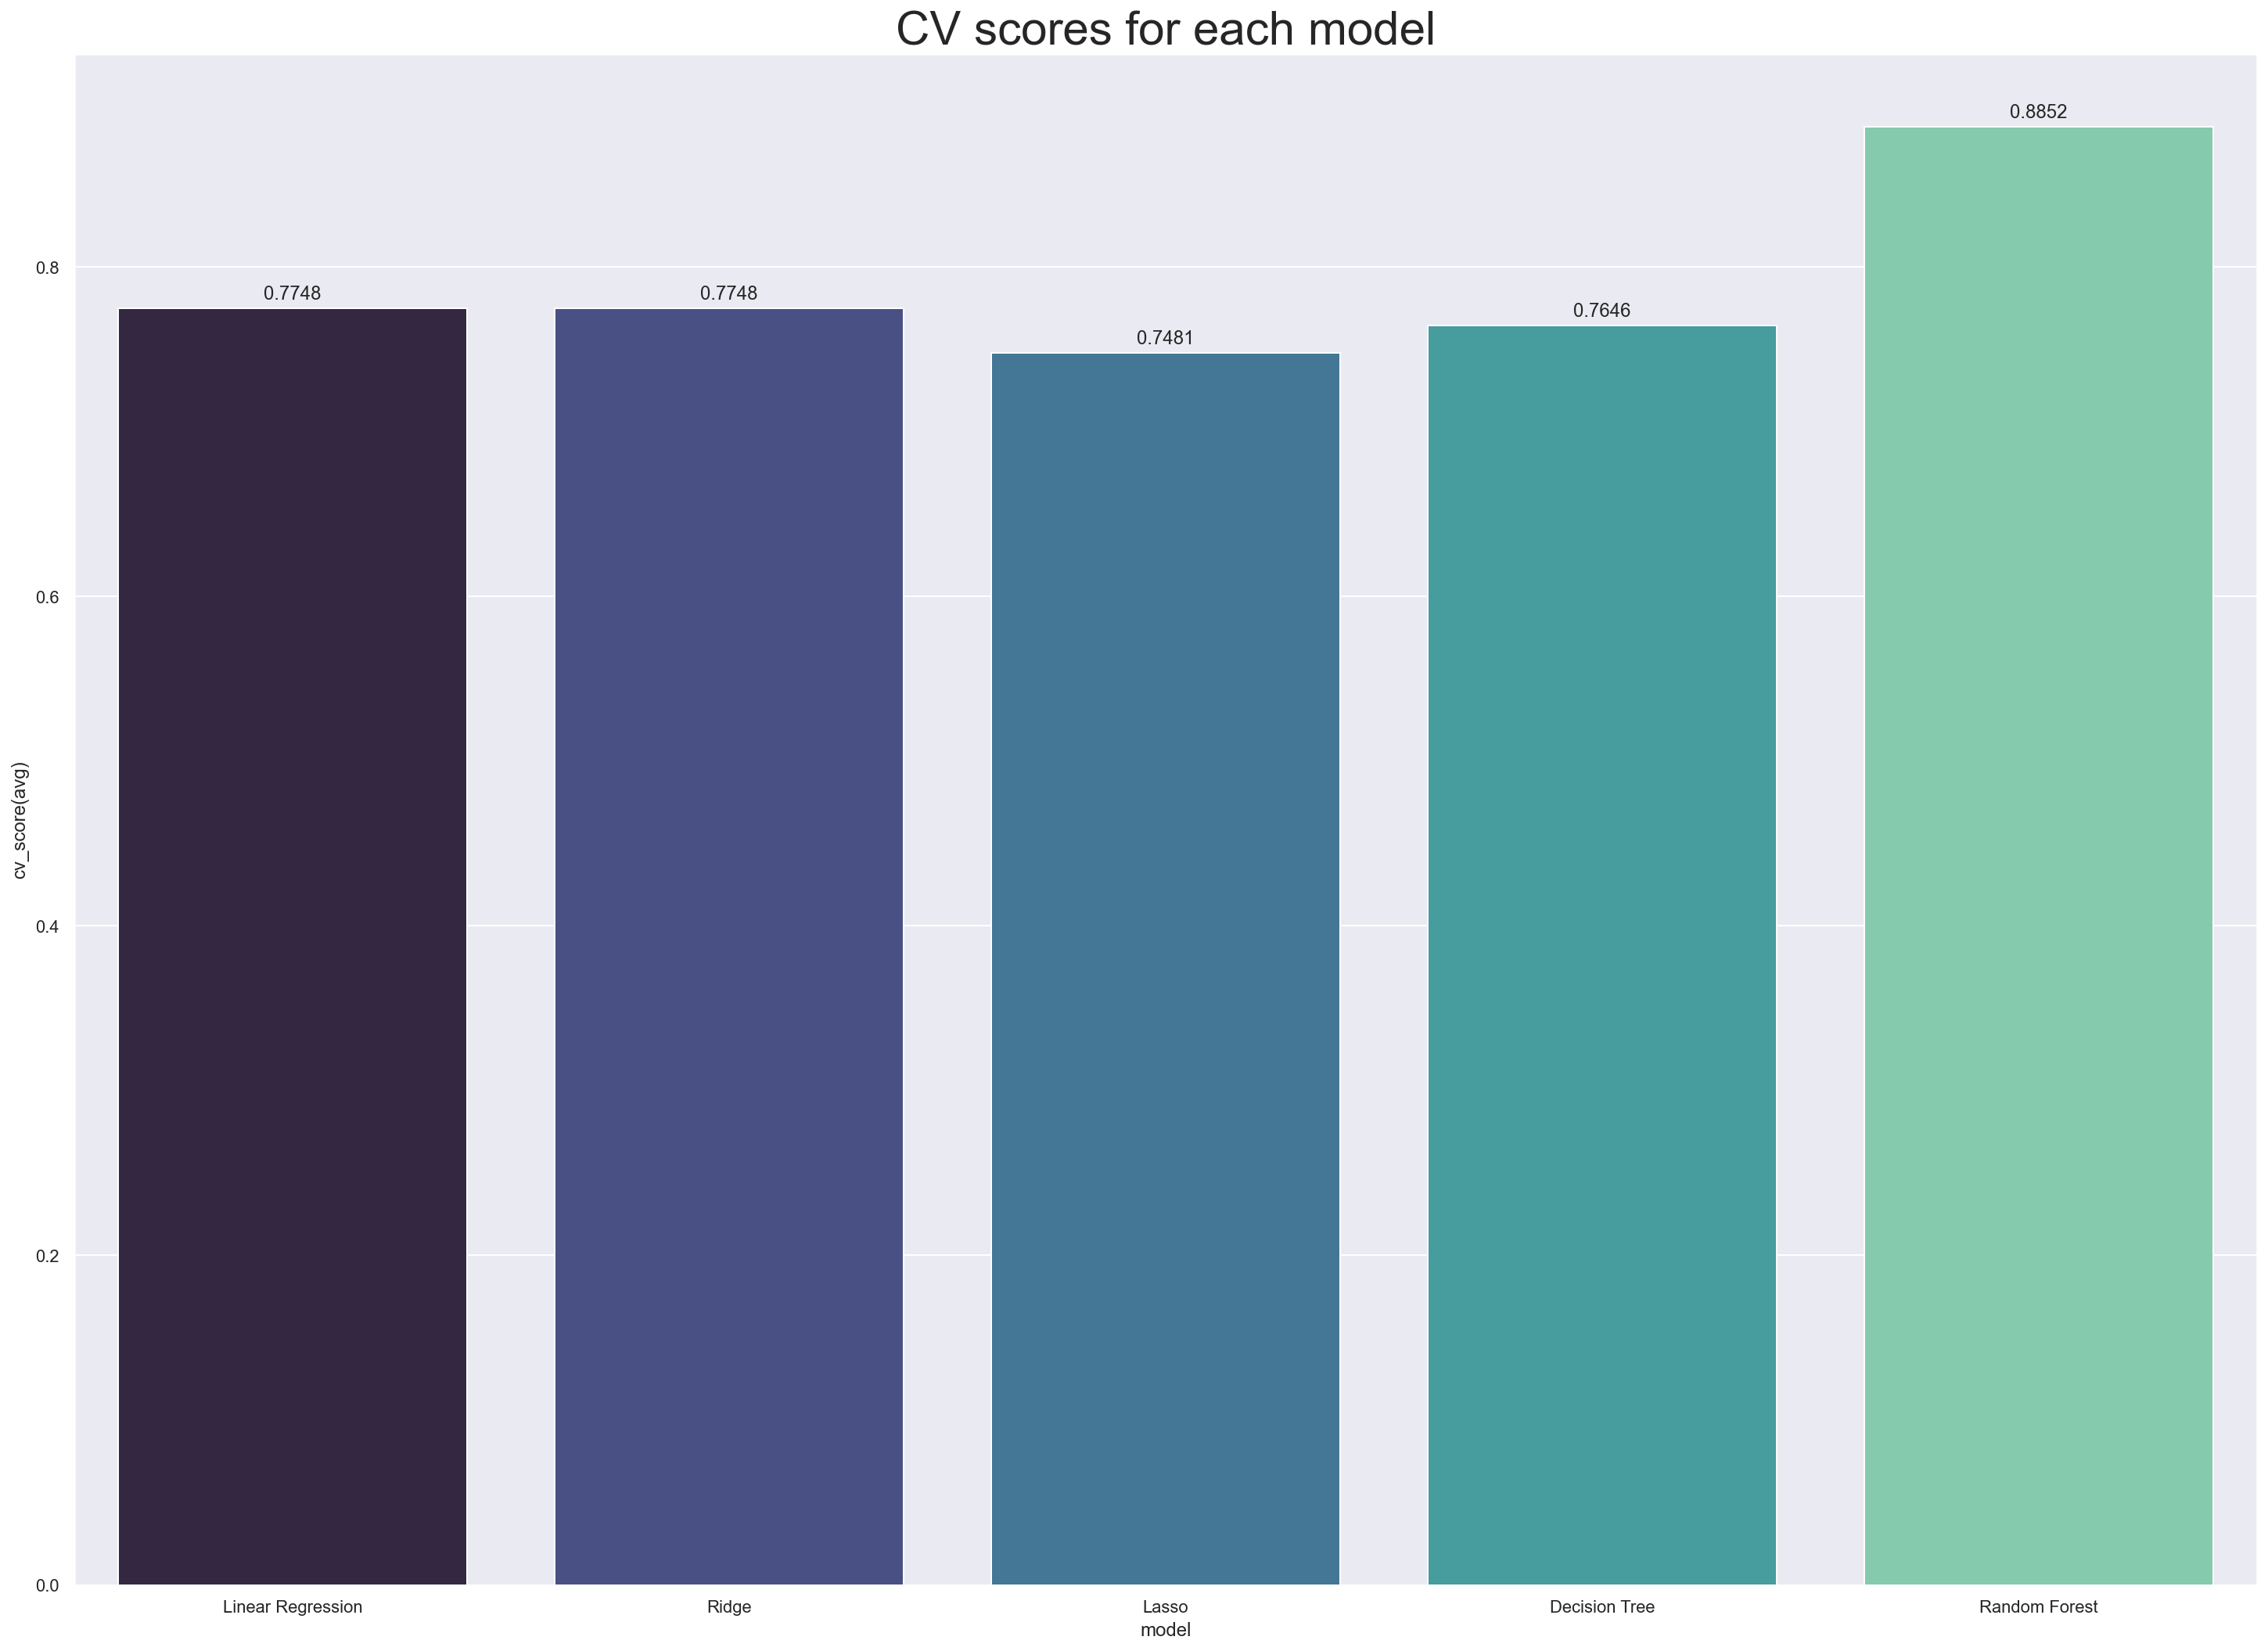

In [53]:
# Creating a boxplot to display the CV Score for each model
ax = sns.barplot(x='model', y='cv_score(avg)', data=performance_df, palette="mako")

# Annotate Bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.axes.set_title("CV scores for each model", fontsize=30)
plt.show()

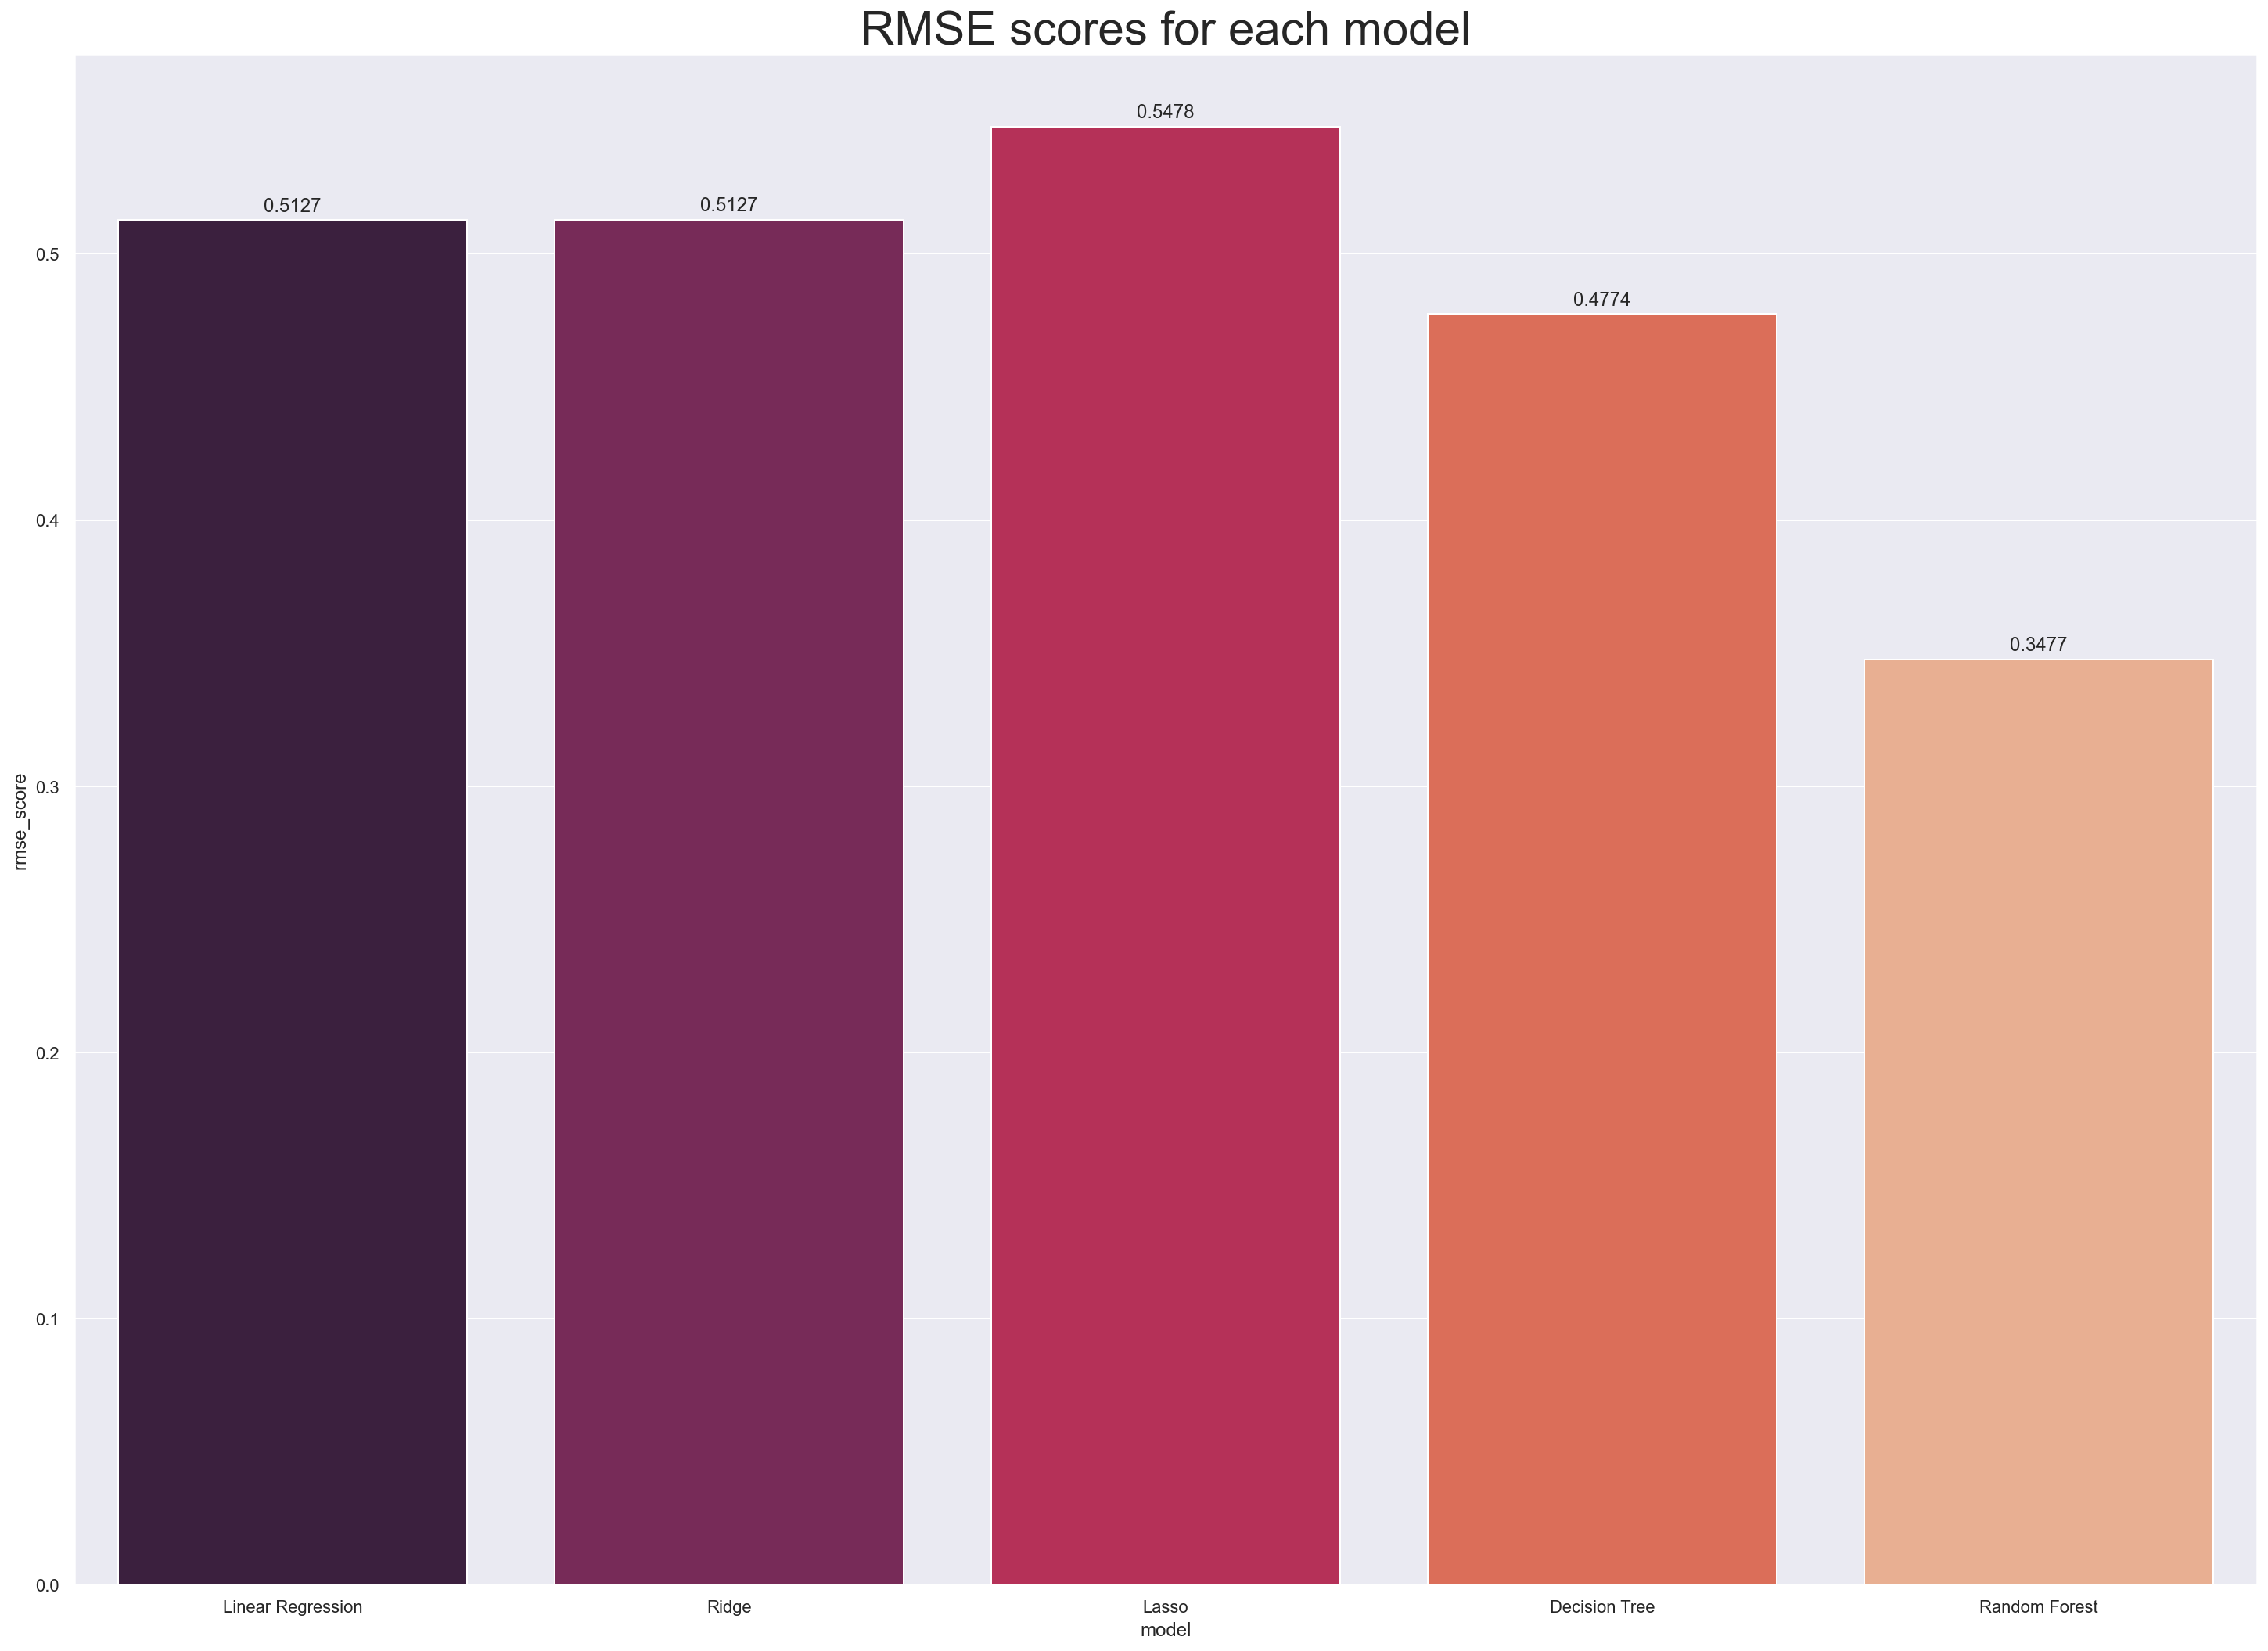

In [54]:
# Creating a boxplot to display the RMSE
sns.set(rc= {'figure.figsize':(25,18)})
ax = sns.barplot(x='model', y='rmse_score', data=performance_df, palette="rocket")

# Annotate Bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.axes.set_title("RMSE scores for each model", fontsize=30)
plt.show()

### Random Forest Investigating Feature Importance

In [55]:
# Feature importance Random Forest
rfr.feature_importances_

array([0.01, 0.51, 0.05, 0.16, 0.02, 0.01, 0.03, 0.09, 0.01, 0.01, 0.01,
       0.02, 0.02, 0.02, 0.02, 0.01])

#### Visualising Feature Importance

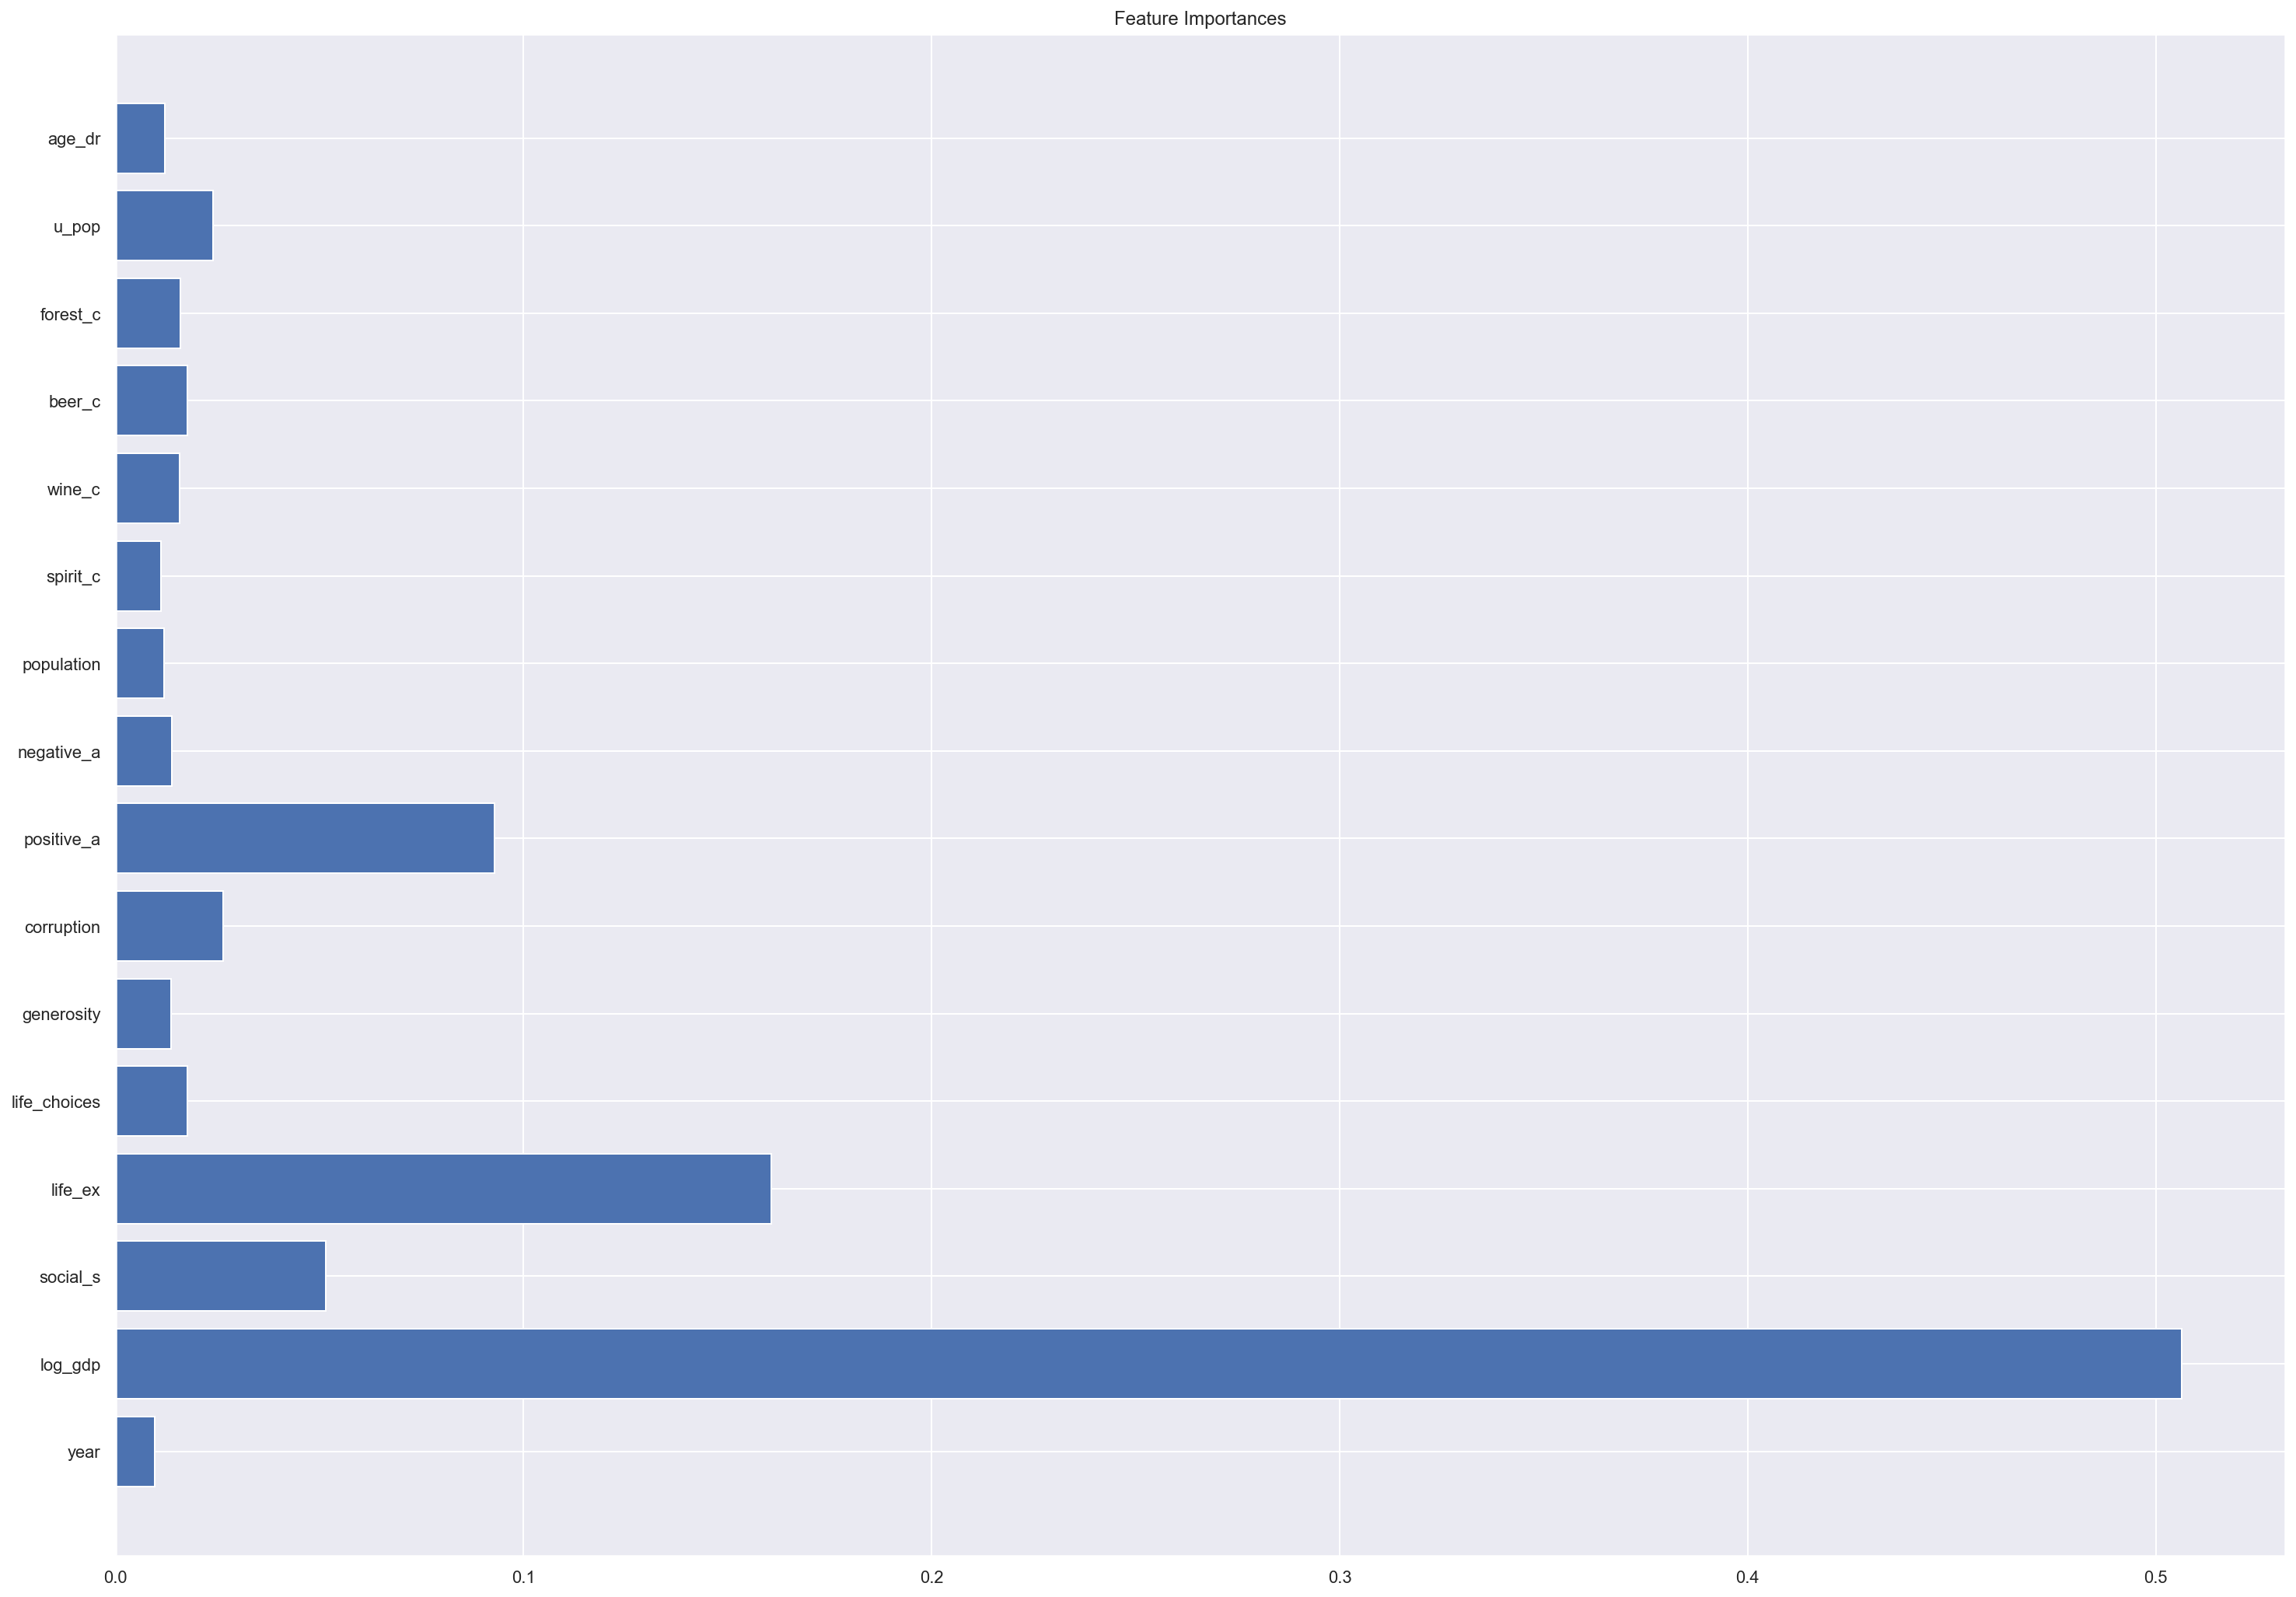

In [56]:
# Bar chart with plotting feature importances

plt.title('Feature Importances')

plt.barh(dfv5.iloc[:, 1:-1].columns, rfr.feature_importances_);

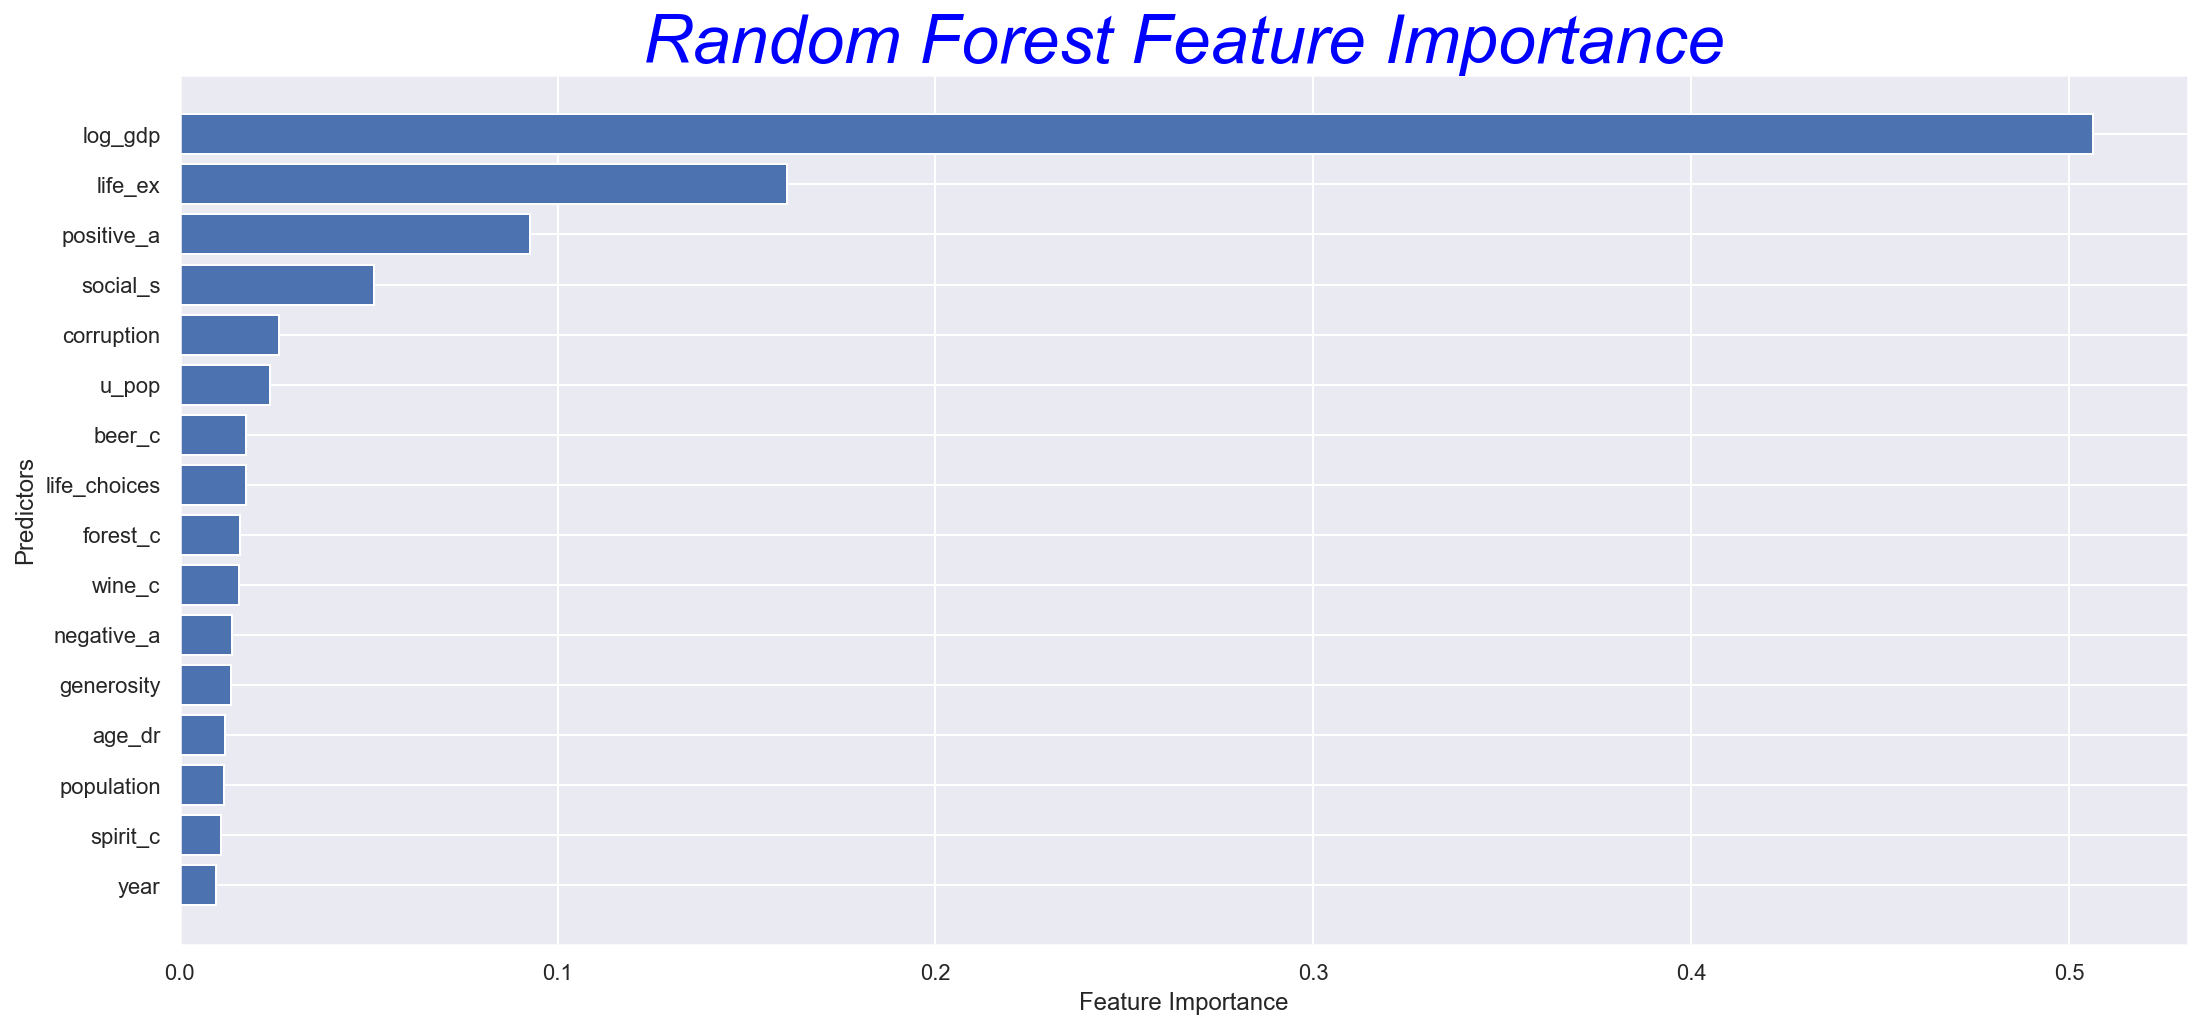

In [57]:
# Ordered bar chart with feature importances
sorted_idx = rfr.feature_importances_.argsort()

plt.figure(figsize=(18,8))
# Labelling chart
plt.title('Random Forest Feature Importance', fontsize = 34.0, color='Blue', fontstyle='italic')
plt.xlabel('Feature Importance')
plt.ylabel('Predictors')


plt.barh(dfv5.iloc[:, 1:-1].columns[sorted_idx], rfr.feature_importances_[sorted_idx]);

# Saving as image and pdf
plt.savefig('Random_Forest_Feature_Importance.png',dpi=100)
##plt.savefig('Random Forest Feature Importance.pdf')

In [58]:
# Creating a df with all features sorted by importance 
f_data = list(zip(dfv5.iloc[:, 1:-1].columns, rfr.feature_importances_))
new_df = pd.DataFrame(f_data, columns =['Feature', 'Importance'])

# Sorting the dataframe by feature importance
new_dfs = new_df.sort_values(by='Importance', ascending=False)
new_dfs['Cummulative'] = new_df['Importance'].cumsum()
new_dfs.reset_index(drop=True)

,Feature,Importance,Cummulative
0,log_gdp,0.506310,0.515891
1,life_ex,0.160623,0.727946
2,positive_a,0.092801,0.878239
3,social_s,0.051433,0.567323
4,corruption,0.026353,0.785438
5,u_pop,0.023841,0.987999
6,beer_c,0.017692,0.948209
7,life_choices,0.017569,0.745516
8,forest_c,0.015950,0.964158
9,wine_c,0.015597,0.930517


<div class="alert alert-block alert-danger">
<b>GDP</b> has a <u>very large feature importance </u> (.5071), and we will be looking into dropping this feature in our final modelling phase. Firstly, we would like to use qualitative against quantitative features and secondly GDP is something harder to perceive by an individual compared to social support, corruption, life choices or other qualitative measures closer to them. 
</div>

### Visualising Actual vs Fitted Values

/Users/cristianravalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/cristianravalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


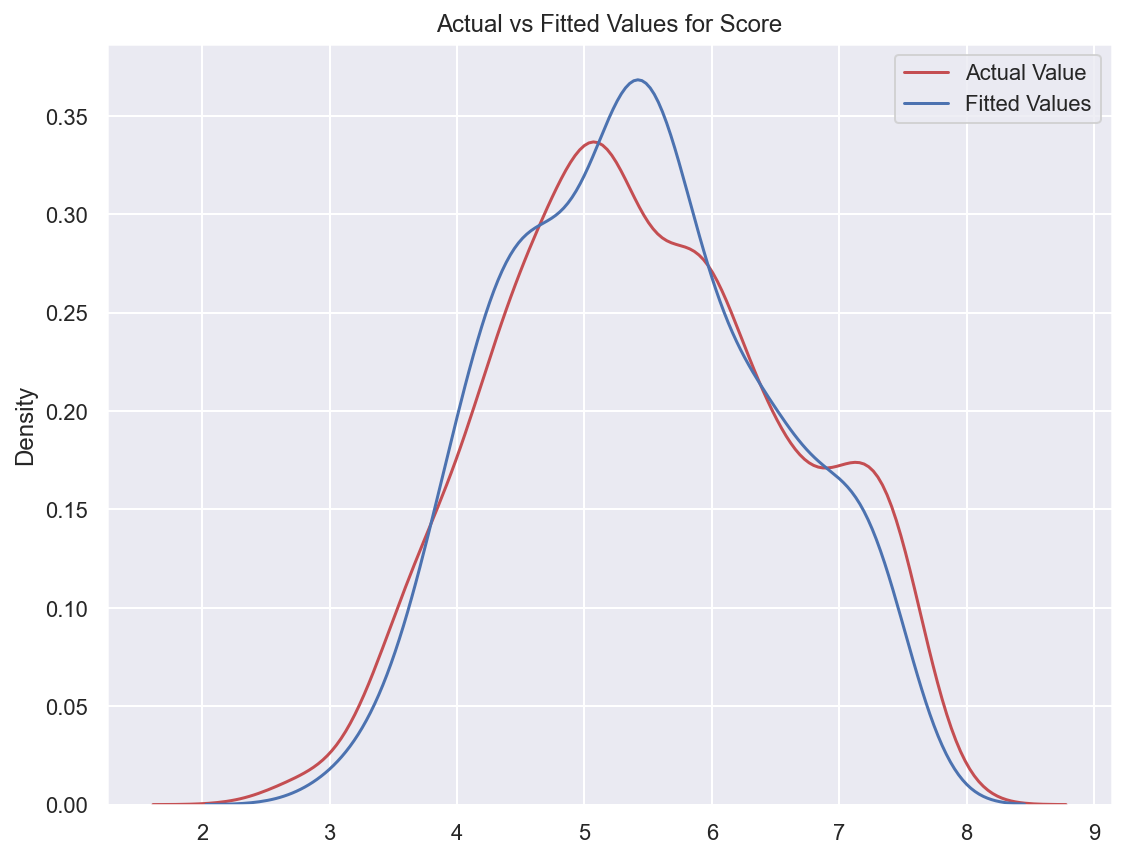

In [59]:
plt.figure(figsize=(9, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Score')
plt.legend()

plt.show()
plt.close()

### Optimising our Forest Regression Model by performing a KFold and Grid Search

In [60]:
# Importing Modules
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error

In [61]:
# Random Forest Regressor Parameters
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 8,
 'verbose': 0,
 'warm_start': False}

#### K-Fold

In [62]:
# Creating features and target variable
Xkf = dfv5.iloc[:, 1:-1].values
ykf = dfv5.iloc[:, -1].values

In [63]:
# Importing train, test, split
from sklearn.model_selection import train_test_split
Xkf_train, Xkf_test, ykf_train, ykf_test = train_test_split(Xkf, ykf, 
                                                    test_size = 0.2,
                                                    random_state=8)

In [64]:
# Standardising data
Xkf_train = sc.fit_transform(Xkf_train)

In [65]:
Xkf_test = sc.transform(Xkf_test)

In [66]:
# Importing Kfold module
from sklearn.model_selection import KFold

# Creating instances for KFold and Regressor using KFold
kf = KFold(n_splits=5, shuffle=True, random_state=8)
kfrfr = RandomForestRegressor(n_estimators = 100,
                                  random_state = 8)
# Fitting the Model
kfrfr.fit(Xkf_train, ykf_train)

RandomForestRegressor(random_state=8)

In [67]:
# Predicting
ykf_pred = kfrfr.predict(Xkf_test)
np.set_printoptions(precision=2)

In [68]:
# get cross validated scores
kfrfr_cvs = cross_val_score(kfrfr, Xkf_train, ykf_train, cv=kf)
print("Cross-validated training scores:", kfrfr_cvs)
print("Mean cross-validated training score:", kfrfr_cvs.mean())

# fit and evaluate the data on the whole training set
kfrfr.fit(Xkf_train, ykf_train)
print("Training Score:", kfrfr.score(Xkf_train, ykf_train))

# evaluate the data on the test set
print("Test Score:", kfrfr.score(Xkf_test, ykf_test))

kfrfr_rmse = np.sqrt(mean_squared_error(ykf_test, ykf_pred))
print('RMSE Score:', rfr_rmse )

Cross-validated training scores: [0.9  0.88 0.88 0.88 0.89]
Mean cross-validated training score: 0.8874613301612954
Training Score: 0.9862772370374947
Test Score: 0.9040675638217851
RMSE Score: 0.3476552547059251


<div class="alert alert-block alert-warning">
<u>No improvement</u> of our score and RMSE by using KFold.
</div>

#### Grid Search

In [69]:
# Defining predictor and target variables
Xgs = dfv5.iloc[:, 1:-1].values
ygs = dfv5.iloc[:, -1].values

In [70]:
# Importing train, test, split
from sklearn.model_selection import train_test_split
Xgs_train, Xgs_test, ygs_train, ygs_test = train_test_split(Xgs, ygs, 
                                                    test_size = 0.2,
                                                    random_state=8)

In [71]:
# Scaling my feature variable
Xgs_train = sc.fit_transform(Xgs_train)

In [72]:
Xgs_test = sc.transform(Xgs_test)

In [73]:
# adding various additional parameters to Random Forst Regression Model
params = {'bootstrap': [True,False],# True equals samples are used (default param), False uses the whole dataset
          'ccp_alpha': [0.0],
          'criterion': ['mse'],
          'max_depth': [None,10,20,30,40,50,60,70,80,90,100],# Default None. Expands until no more samples to split
          'max_features': ['auto','sqrt','log2'],# the number of features to consider when looking for the best split
          'max_leaf_nodes': [None],
          'max_samples': [None],
          'min_impurity_decrease': [0.0],
          'min_impurity_split': [None],
          'min_samples_leaf': [1,2,4],
          'min_samples_split': [2,5,10],# Minimum number of samples left after the last split
          'min_weight_fraction_leaf': [0.0],
          'n_estimators': [100,10,25,50,75], # Number of trees in our Random Forest
          'n_jobs': [None],
          'oob_score': [False],
          'random_state': [8],
          'verbose': [0],
          'warm_start': [False]
         }

# Instantiate GS and fit
gs = GridSearchCV(rfr, param_grid=params, cv=kf, n_jobs=-2)
gs.fit(Xgs_train, ygs_train)

ygs_pred = rfr.predict(Xgs_test)
np.set_printoptions(precision=2)

# Get results
model = gs.best_estimator_
print(gs.best_estimator_)

print('R2 training: ', gs.score(Xgs_train, ygs_train))
print('R2 CV training: ', gs.best_score_)
print('R2 test: ', gs.score(Xgs_test, ygs_test))

rfrgs_rmse = np.sqrt(mean_squared_error(ygs_test, ygs_pred))
print('RMSE Score:', rfrgs_rmse )

RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      random_state=8)
R2 training:  0.9999947358513086
R2 CV training:  0.9015071951007609
R2 test:  0.9187057523358286
RMSE Score: 0.3476552547059251


<div class="alert alert-block alert-success">
Judging from our <u>training scores</u> the grid searched Random Forest is still overfitting our data. 

However, when <u>cross validating</u> our scores the cv scores are relatively close to our test scores.

Looking at the <u>standard deviation of the residuals</u> (RMSE), the value stays in line with our original Random Forest.
</div>

### XG Boost

In [74]:
# Creating our feature and target variable
Xxg = dfv6.iloc[:, 1:-1].values
yxg = dfv6.iloc[:, -1].values

In [75]:
# Import train, test, split
from sklearn.model_selection import train_test_split
Xxg_train, Xxg_test, yxg_train, yxg_test = train_test_split(Xxg, yxg, test_size = 0.2, random_state = 8)

In [76]:
# Standard scale our features
Xxg_train = sc.fit_transform(Xxg_train)

In [77]:
Xxg_test = sc.transform(Xxg_test)

In [78]:
# Instantiating and fitting Regressor
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(Xxg_train, yxg_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=10,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [79]:
# Predict
yxg_pred = xgb.predict(Xxg_test)
np.set_printoptions(precision=2)

In [80]:
# get cross validated scores
xgb_cvs = cross_val_score(xgb, Xxg_train, yxg_train, cv=5)
print("Cross-validated training scores:", xgb_cvs)
print("Mean cross-validated training score:", xgb_cvs.mean())

# fit and evaluate the data on the whole training set
xgb.fit(Xxg_train, yxg_train)
print("Training Score:", xgb.score(Xxg_train, yxg_train))

# evaluate the data on the test set
print("Test Score:", xgb.score(Xxg_test, yxg_test))

xgb_rmse = np.sqrt(mean_squared_error(yxg_test, yxg_pred))
print('RMSE Score:', xgb_rmse )

Cross-validated training scores: [0.87 0.87 0.9  0.87 0.88]
Mean cross-validated training score: 0.8765108652076453
Training Score: 0.998927833939684
Test Score: 0.8910509688061917
RMSE Score: 0.37049107263456776


<div class="alert alert-block alert-warning">
XG Boost <b>doesn't beat</b> the Random Forest Regressor without and with hyperparameter tunning.
</div>

In [81]:
# Creating Dataframe for KFold, GridSearch and Boosting
kf_gs_df = {'model': ["K-Fold", "Grid Search", "XG Boost"],
        'short_name': ["kf", "gs", "xgb"],
        'cv_score(avg)': [kfrfr_cvs.mean(), gs.best_score_,xgb_cvs.mean()],
        'training_score': [kfrfr.score(Xkf_train, ykf_train),
                           lasso.score(Xl_train, yl_train),
                          xgb.score(Xxg_train, yxg_train)],
        'test_score': [kfrfr.score(Xkf_test, ykf_test),gs.score(Xgs_test, ygs_test),
                       xgb.score(Xxg_test, yxg_test)],
        'rmse_score': [kfrfr_rmse, rfrgs_rmse, xgb_rmse]
        }
kf_gs_df = pd.DataFrame(data=kf_gs_df)

kf_gs_df

,model,short_name,cv_score(avg),training_score,test_score,rmse_score
0,K-Fold,kf,0.887461,0.986277,0.904068,0.347655
1,Grid Search,gs,0.901507,0.753831,0.918706,0.347655
2,XG Boost,xgb,0.876511,0.998928,0.891051,0.370491


<div class="alert alert-block alert-success">
We managed to <u>improve</u> our R2 score by more than 1% with our Grid Search and optimising our Random Forest parameters.
</div>

In [82]:
# Export dataframe as png
dfi.export(kf_gs_df,'kf_gs_df.png')

[0314/203809.411249:INFO:headless_shell.cc(659)] Written to file /var/folders/b2/wsl4pn8x4lz_9scydxm8jkkm0000gn/T/tmpizni8izz/temp.png.


#### Visualsing our Scores for the optimised Models

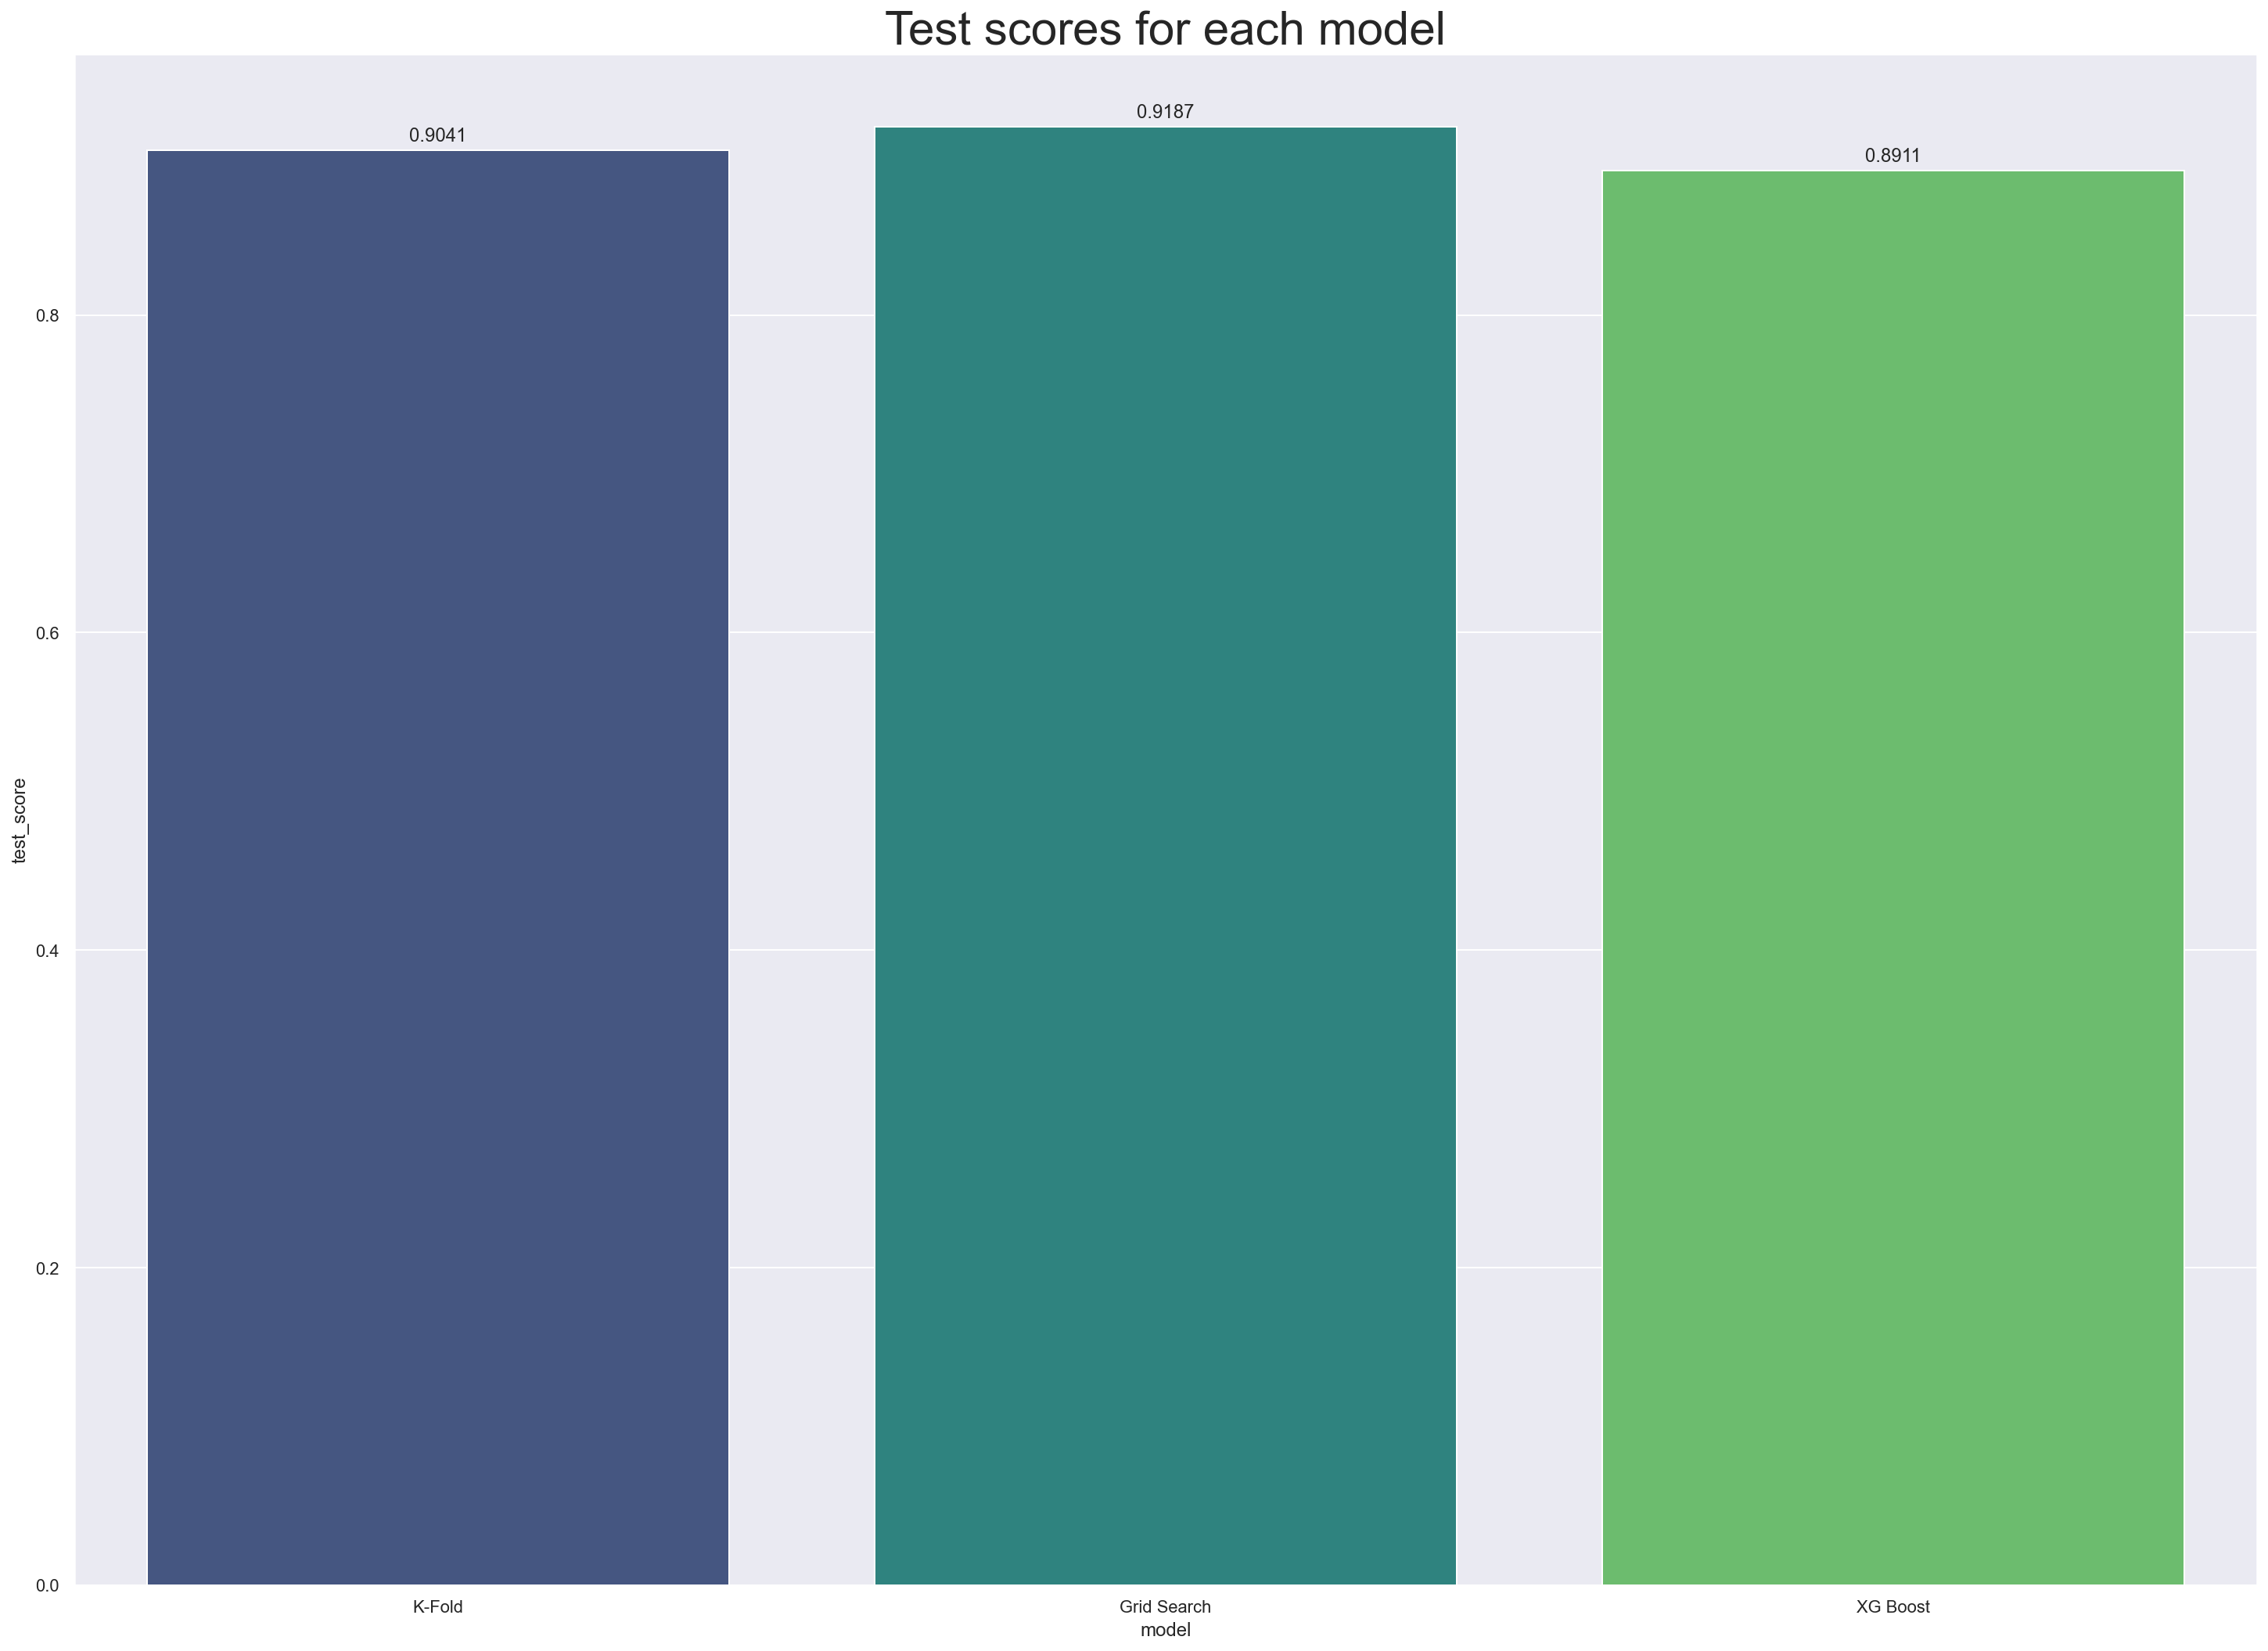

In [83]:
# Creating a boxplot to display the test score
sns.set(rc= {'figure.figsize':(25,18)})
ax = sns.barplot(x='model', y='test_score', data=kf_gs_df, palette="viridis")

# Annotate Bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.axes.set_title("Test scores for each model", fontsize=30)
plt.show()

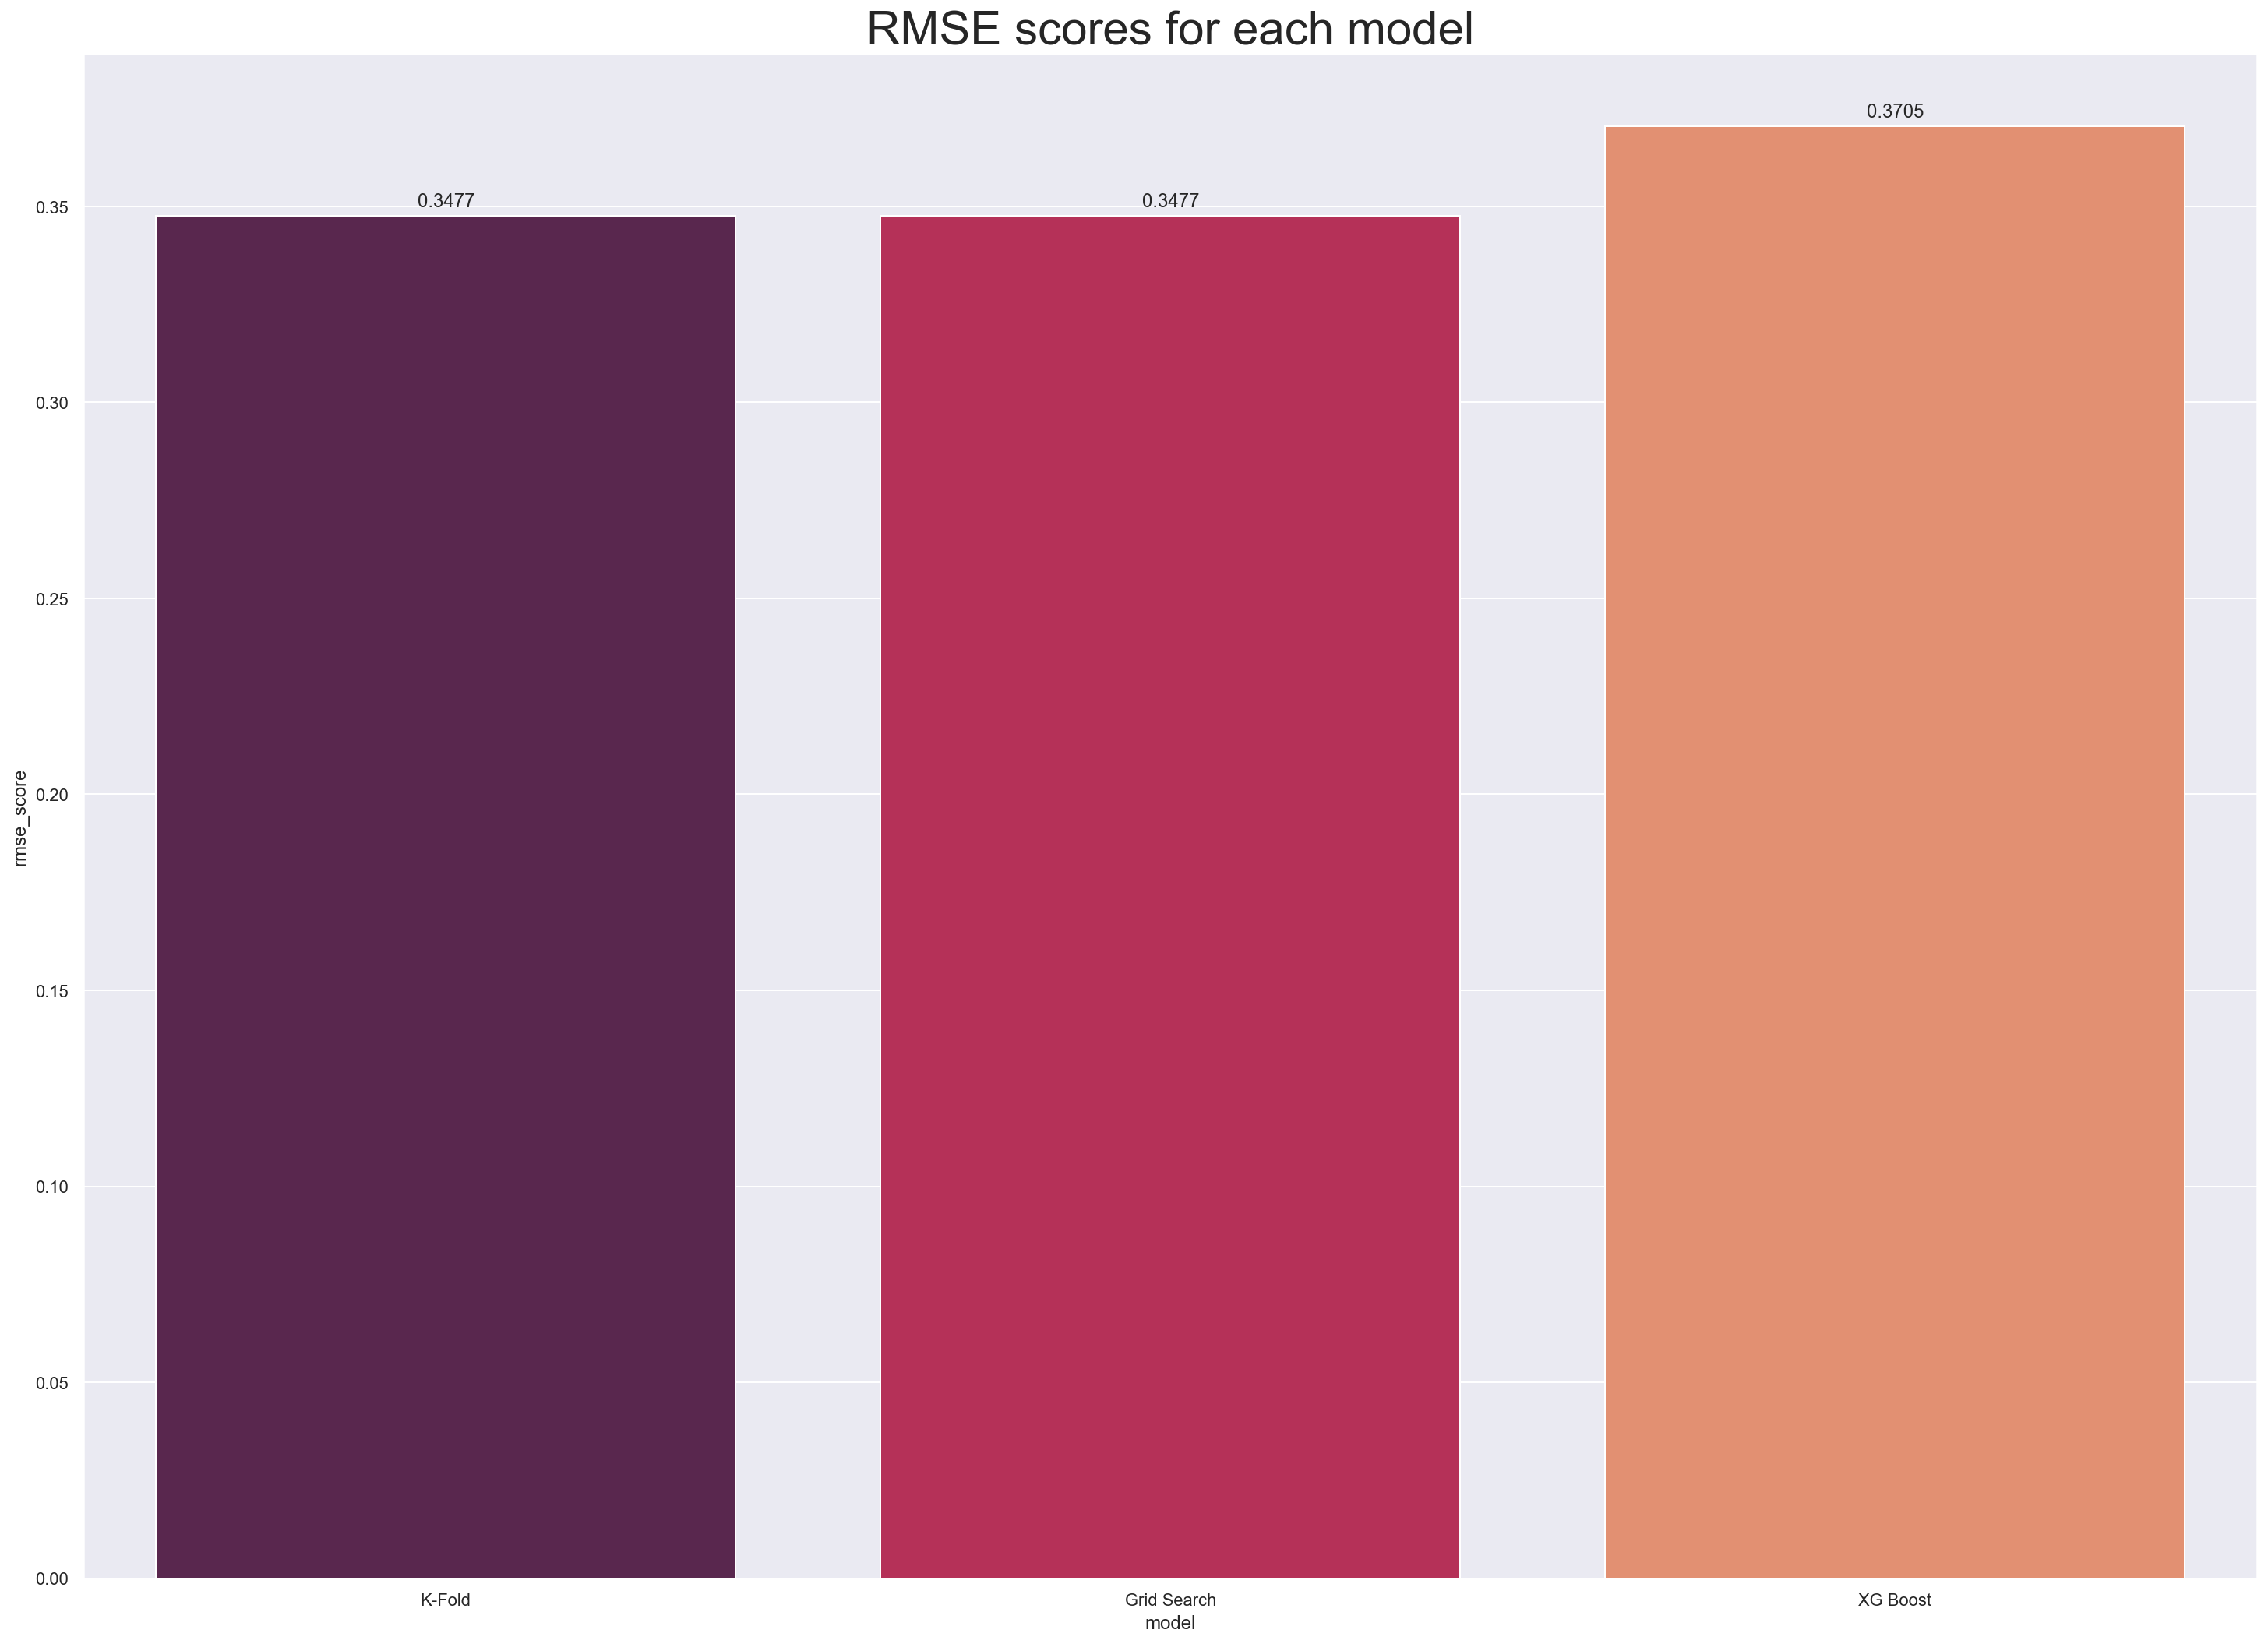

In [84]:
# Creating a boxplot to display the RMSE
sns.set(rc= {'figure.figsize':(25,18)})
ax = sns.barplot(x='model', y='rmse_score', data=kf_gs_df, palette="rocket")

# Annotate Bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.axes.set_title("RMSE scores for each model", fontsize=30)
plt.show()

### Exploring original features versus new features on Best Model

In [85]:
# All available features including target dataframe
dfv7.sample()

,Unnamed: 0,year,log_gdp,social_s,life_ex,life_choices,generosity,corruption,positive_a,negative_a,population,spirit_c,wine_c,beer_c,forest_c,u_pop,age_dr,happiness_s
1485,1485,2008,8.652,0.712,63.9,0.661,0.122,0.68,0.609,0.338,20664037.0,0.67649,0.00545,0.06693,2.614388,54.875,71.392322,5.323


In [86]:
dfv7.columns

Index(['Unnamed: 0', 'year', 'log_gdp', 'social_s', 'life_ex', 'life_choices',
       'generosity', 'corruption', 'positive_a', 'negative_a', 'population',
       'spirit_c', 'wine_c', 'beer_c', 'forest_c', 'u_pop', 'age_dr',
       'happiness_s'],
      dtype='object')

### Creating two data frames for original happy features and additionally selected features.

#### Investigating Original Features Only

In [87]:
of = dfv7[['log_gdp', 'social_s', 'life_ex', 'life_choices', 'generosity',
                   'corruption', 'positive_a', 'negative_a', 'happiness_s']]

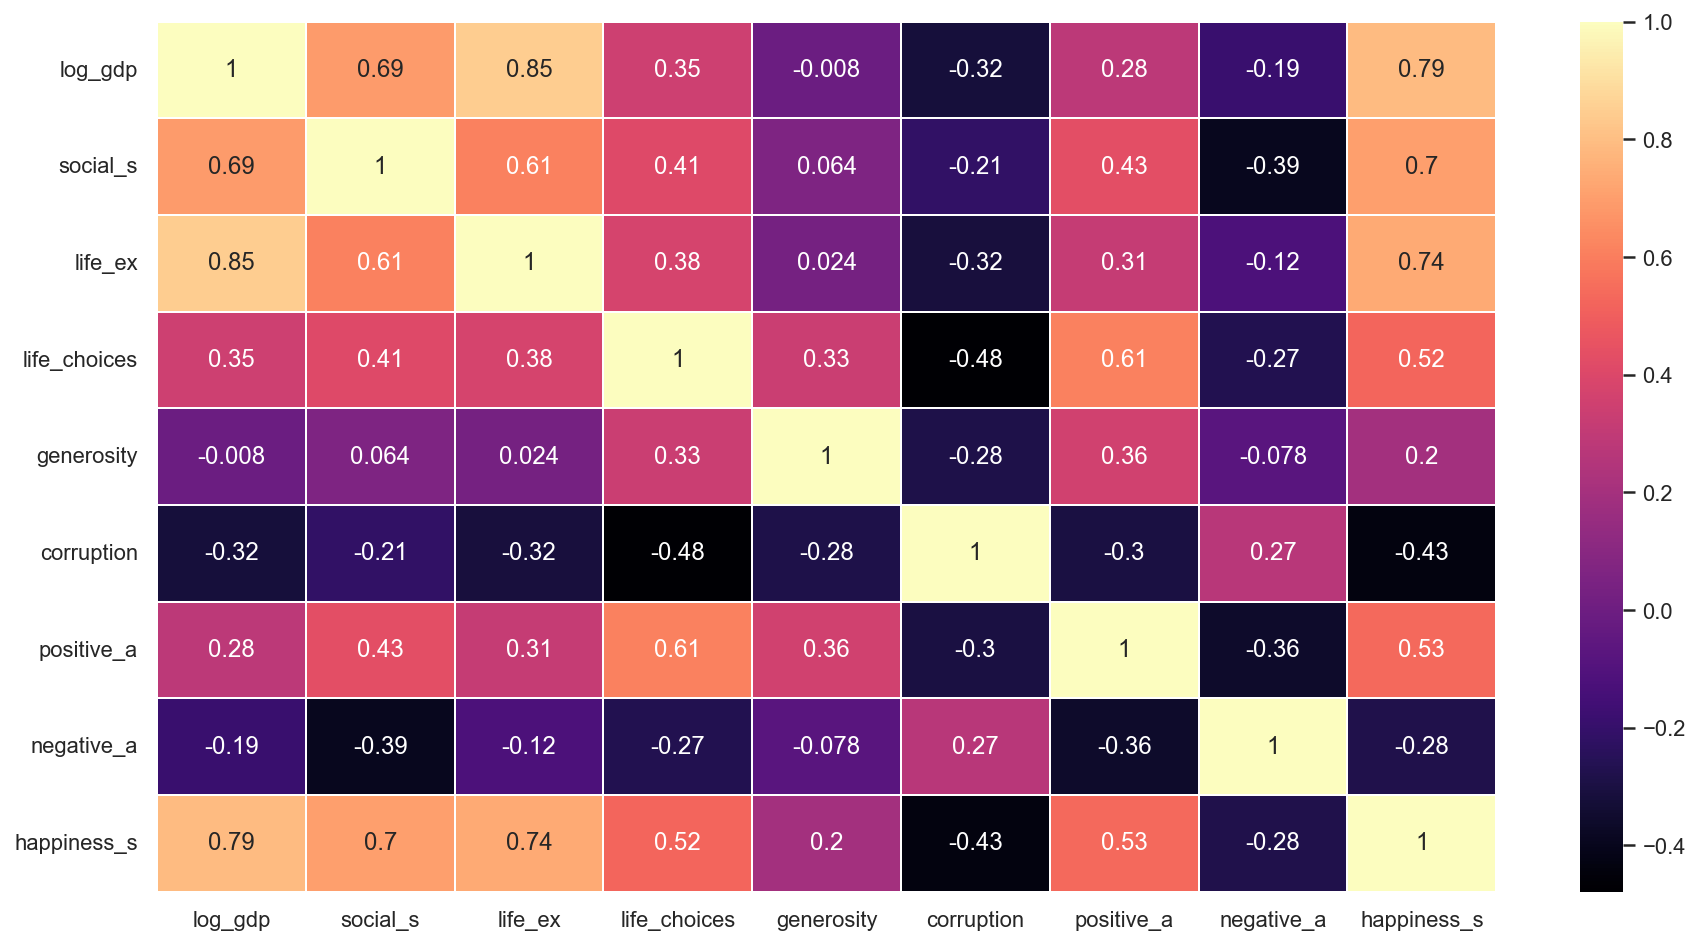

In [88]:
#Investigating correlation through heatmap
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap((of).corr(), annot=True, 
            cmap='magma', linecolor='white', linewidths=1);

There are a couple of moderate (.5 -.7) collinearities.
These are between:
    
- social support and GDP (.69)
- life expectation and social support (.61)
- positive_a and life choices (.61)

There are some strong collinearities (> .7) between:

- life expectation and gdp (.85)

We will <u>remove gdp </u> to stick with the topic of more qualitative measures of happiness and with keeping in mind, that GDP made up a very large part of feature importance, when investigated earlier in our Random Forest feature importance table.

In [89]:
# Creating the new dataframe without GDP
of1 = of.copy()

In [90]:
of1 = of.drop(columns='log_gdp')

In [91]:
of1.columns

Index(['social_s', 'life_ex', 'life_choices', 'generosity', 'corruption',
       'positive_a', 'negative_a', 'happiness_s'],
      dtype='object')

In [92]:
# Number of features excluding target
len(of1.columns)-1

7

#### Investigating New Features Only

In [93]:
nf = dfv7[['population', 'spirit_c','wine_c', 'beer_c', 'forest_c', 
                   'u_pop', 'age_dr','happiness_s']]

In [94]:
len(nf.columns)-1

7

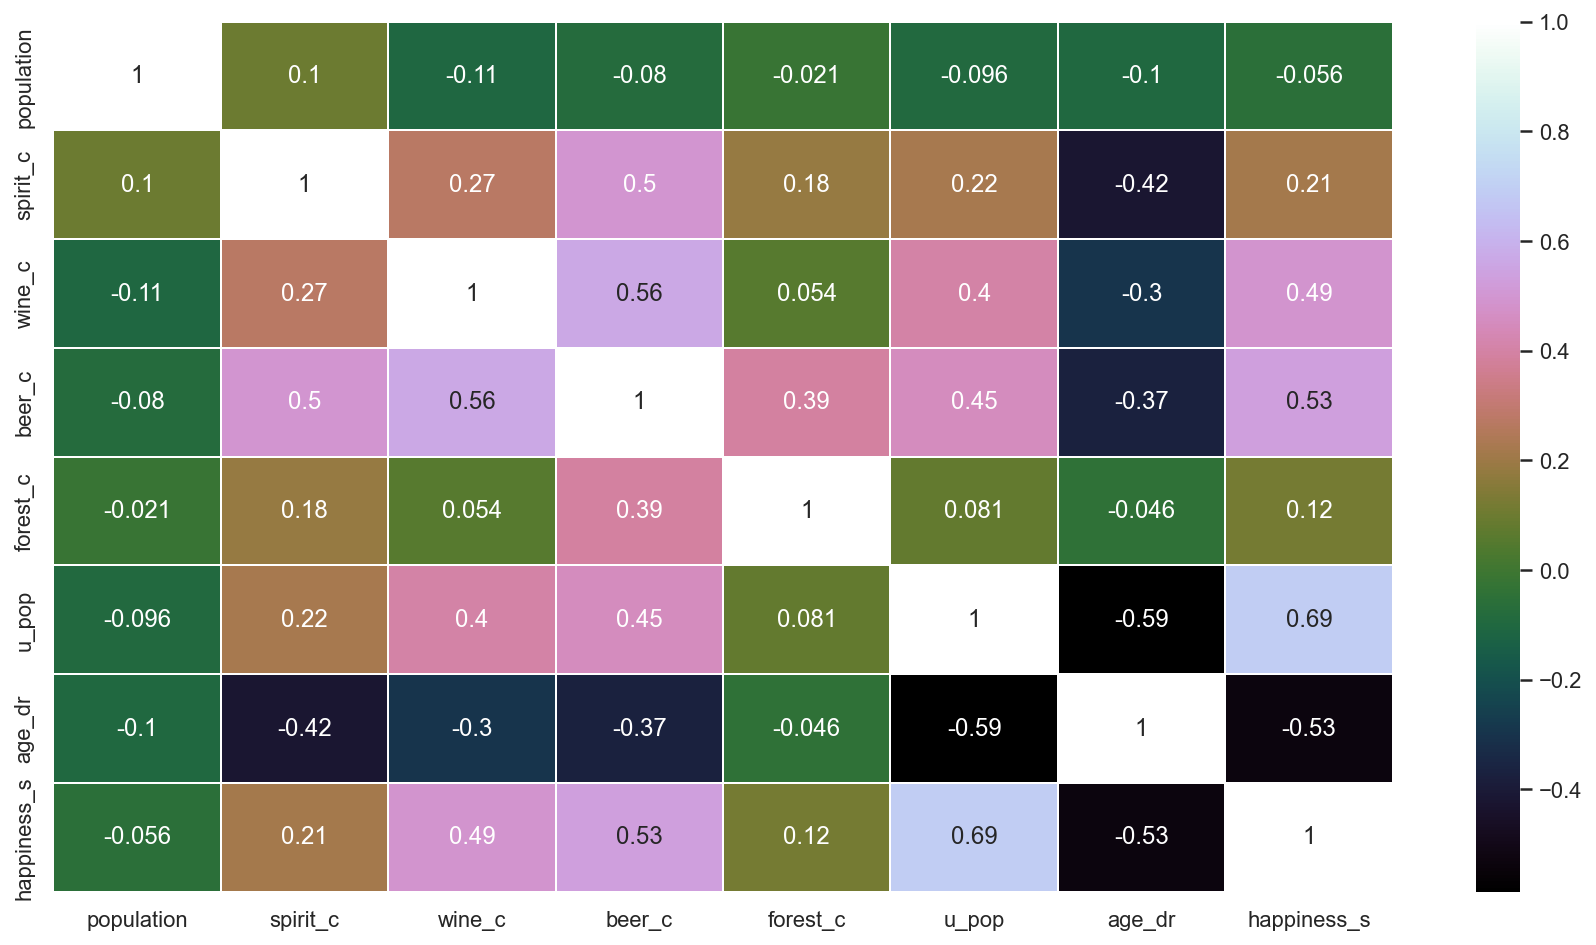

In [95]:
#Investigating correlation through heatmap
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap((nf).corr(), annot=True, 
            cmap='cubehelix', linecolor='white', linewidths=1);

There are a couple of moderate (.5 - .7) collinearities.
These are between:
    
- beer and spirit (.5)
- beer and wine (.56)
- age dependency and urban population (-.59)

We will <u> remove beer consumption </u> as it's moderately correlated with spirit and wine. We will leave age dependency and urban population for now, as there is only moderate collinearity.

In [96]:
# Creating the new dataframe without GDP
nf1 = nf.copy()

In [97]:
nf1 = nf.drop(columns='beer_c')

In [98]:
nf1.columns

Index(['population', 'spirit_c', 'wine_c', 'forest_c', 'u_pop', 'age_dr',
       'happiness_s'],
      dtype='object')

In [99]:
len(nf1.columns)-1

6

### Optimised Random Forest Regression Original Features vs New Features

#### Original Features First

In [100]:
# Creating feature and target for Original Features
Xo = of1.iloc[:, :-1].values
yo = of1.iloc[:, -1].values

In [101]:
of1.iloc[:,:-1].columns

Index(['social_s', 'life_ex', 'life_choices', 'generosity', 'corruption',
       'positive_a', 'negative_a'],
      dtype='object')

In [102]:
from sklearn.model_selection import train_test_split
Xo_train, Xo_test, yo_train, yo_test = train_test_split(Xo, yo, 
                                                    test_size = 0.2,
                                                    random_state=8)

In [103]:
# Scale Data
Xo_train = sc.fit_transform(Xo_train)

In [104]:
Xo_test = sc.transform(Xo_test)

In [105]:
# Train the Random Forest Regression Model with optimised parameters
from sklearn.ensemble import RandomForestRegressor
orfr = RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=75,
                      random_state=8)
# Fit the Model
orfr.fit(Xo_train, yo_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=75,
                      random_state=8)

In [106]:
#Predict
yo_pred = orfr.predict(Xo_test)
np.set_printoptions(precision=2)

In [107]:
# get cross validated scores
orfr_cvs = cross_val_score(orfr, Xo_train, yo_train, cv=5)
print("Cross-validated training scores:", orfr_cvs)
print("Mean cross-validated training score:", orfr_cvs.mean())

# fit and evaluate the data on the whole training set
orfr.fit(Xo_train, yo_train)
print("Training Score:", orfr.score(Xo_train, yo_train))

# evaluate the data on the test set
print("Test Score:", orfr.score(Xo_test, yo_test))

orfr_rmse = np.sqrt(mean_squared_error(yo_test, yo_pred))
print('RMSE Score:', orfr_rmse )

Cross-validated training scores: [0.83 0.81 0.83 0.83 0.82]
Mean cross-validated training score: 0.8232223453038479
Training Score: 1.0
Test Score: 0.8407490690919502
RMSE Score: 0.4479268036818138


<div class="alert alert-block alert-info">
We <u> reduced our features to 7 from originally 15 </u> and are getting a very respectable test score with a RMSE score only beaten by Random Forest, before we optimised it with Grid Search.
</div>

#### Random Forest Regression with newly acquired features

In [108]:
Xn = nf1.iloc[:, :-1].values
yn = nf1.iloc[:, -1].values

In [109]:
# Showing feature names
nf1.iloc[:,:-1].columns

Index(['population', 'spirit_c', 'wine_c', 'forest_c', 'u_pop', 'age_dr'], dtype='object')

In [110]:
from sklearn.model_selection import train_test_split
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, 
                                                    test_size = 0.2,
                                                    random_state=8)

In [111]:
Xn_train = sc.fit_transform(Xn_train)

In [112]:
Xn_test = sc.transform(Xn_test)

In [113]:
# Train the Random Forest Regression Model with optimised parameters
from sklearn.ensemble import RandomForestRegressor
nrfr = RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=75,
                      random_state=8)
nrfr.fit(Xn_train, yn_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=75,
                      random_state=8)

In [114]:
yn_pred = nrfr.predict(Xn_test)
np.set_printoptions(precision=2)

In [115]:
# get cross validated scores
nrfr_cvs = cross_val_score(nrfr, Xn_train, yn_train, cv=5)
print("Cross-validated training scores:", nrfr_cvs)
print("Mean cross-validated training score:", nrfr_cvs.mean())

# fit and evaluate the data on the whole training set
nrfr.fit(Xn_train, yn_train)
print("Training Score:", nrfr.score(Xn_train, yn_train))

# evaluate the data on the test set
print("Test Score:", nrfr.score(Xn_test, yn_test))

nrfr_rmse = np.sqrt(mean_squared_error(yn_test, yn_pred))
print('RMSE Score:', nrfr_rmse )

Cross-validated training scores: [0.87 0.83 0.89 0.87 0.89]
Mean cross-validated training score: 0.8701983193583702
Training Score: 1.0
Test Score: 0.9052387832744999
RMSE Score: 0.34552651152767044


In [116]:
# Creating performance dataframe for our last Modelling 

lm_data = {'model': ["Random Forest_0", "Random Forest_N"],
        'short_name': ["orfr", "nrfr"],
        'cv_score(avg)': [orfr_cvs.mean(), nrfr_cvs.mean()],
        'training_score': [orfr.score(Xo_train, yo_train),
                           nrfr.score(Xn_train, yn_train)],
        'test_score': [orfr.score(Xo_test, yo_test),nrfr.score(Xn_test, yn_test)],
        'rmse_score': [orfr_rmse, nrfr_rmse]
        }
lm_data = pd.DataFrame(data=lm_data)

lm_data

,model,short_name,cv_score(avg),training_score,test_score,rmse_score
0,Random Forest_0,orfr,0.823222,1.0,0.840749,0.447927
1,Random Forest_N,nrfr,0.870198,1.0,0.905239,0.345527


In [117]:
# Export dataframe as png
dfi.export(lm_data,'lm_data.png')

[0314/203815.882627:INFO:headless_shell.cc(659)] Written to file /var/folders/b2/wsl4pn8x4lz_9scydxm8jkkm0000gn/T/tmpzl1atr10/temp.png.


#### Visualising the Results

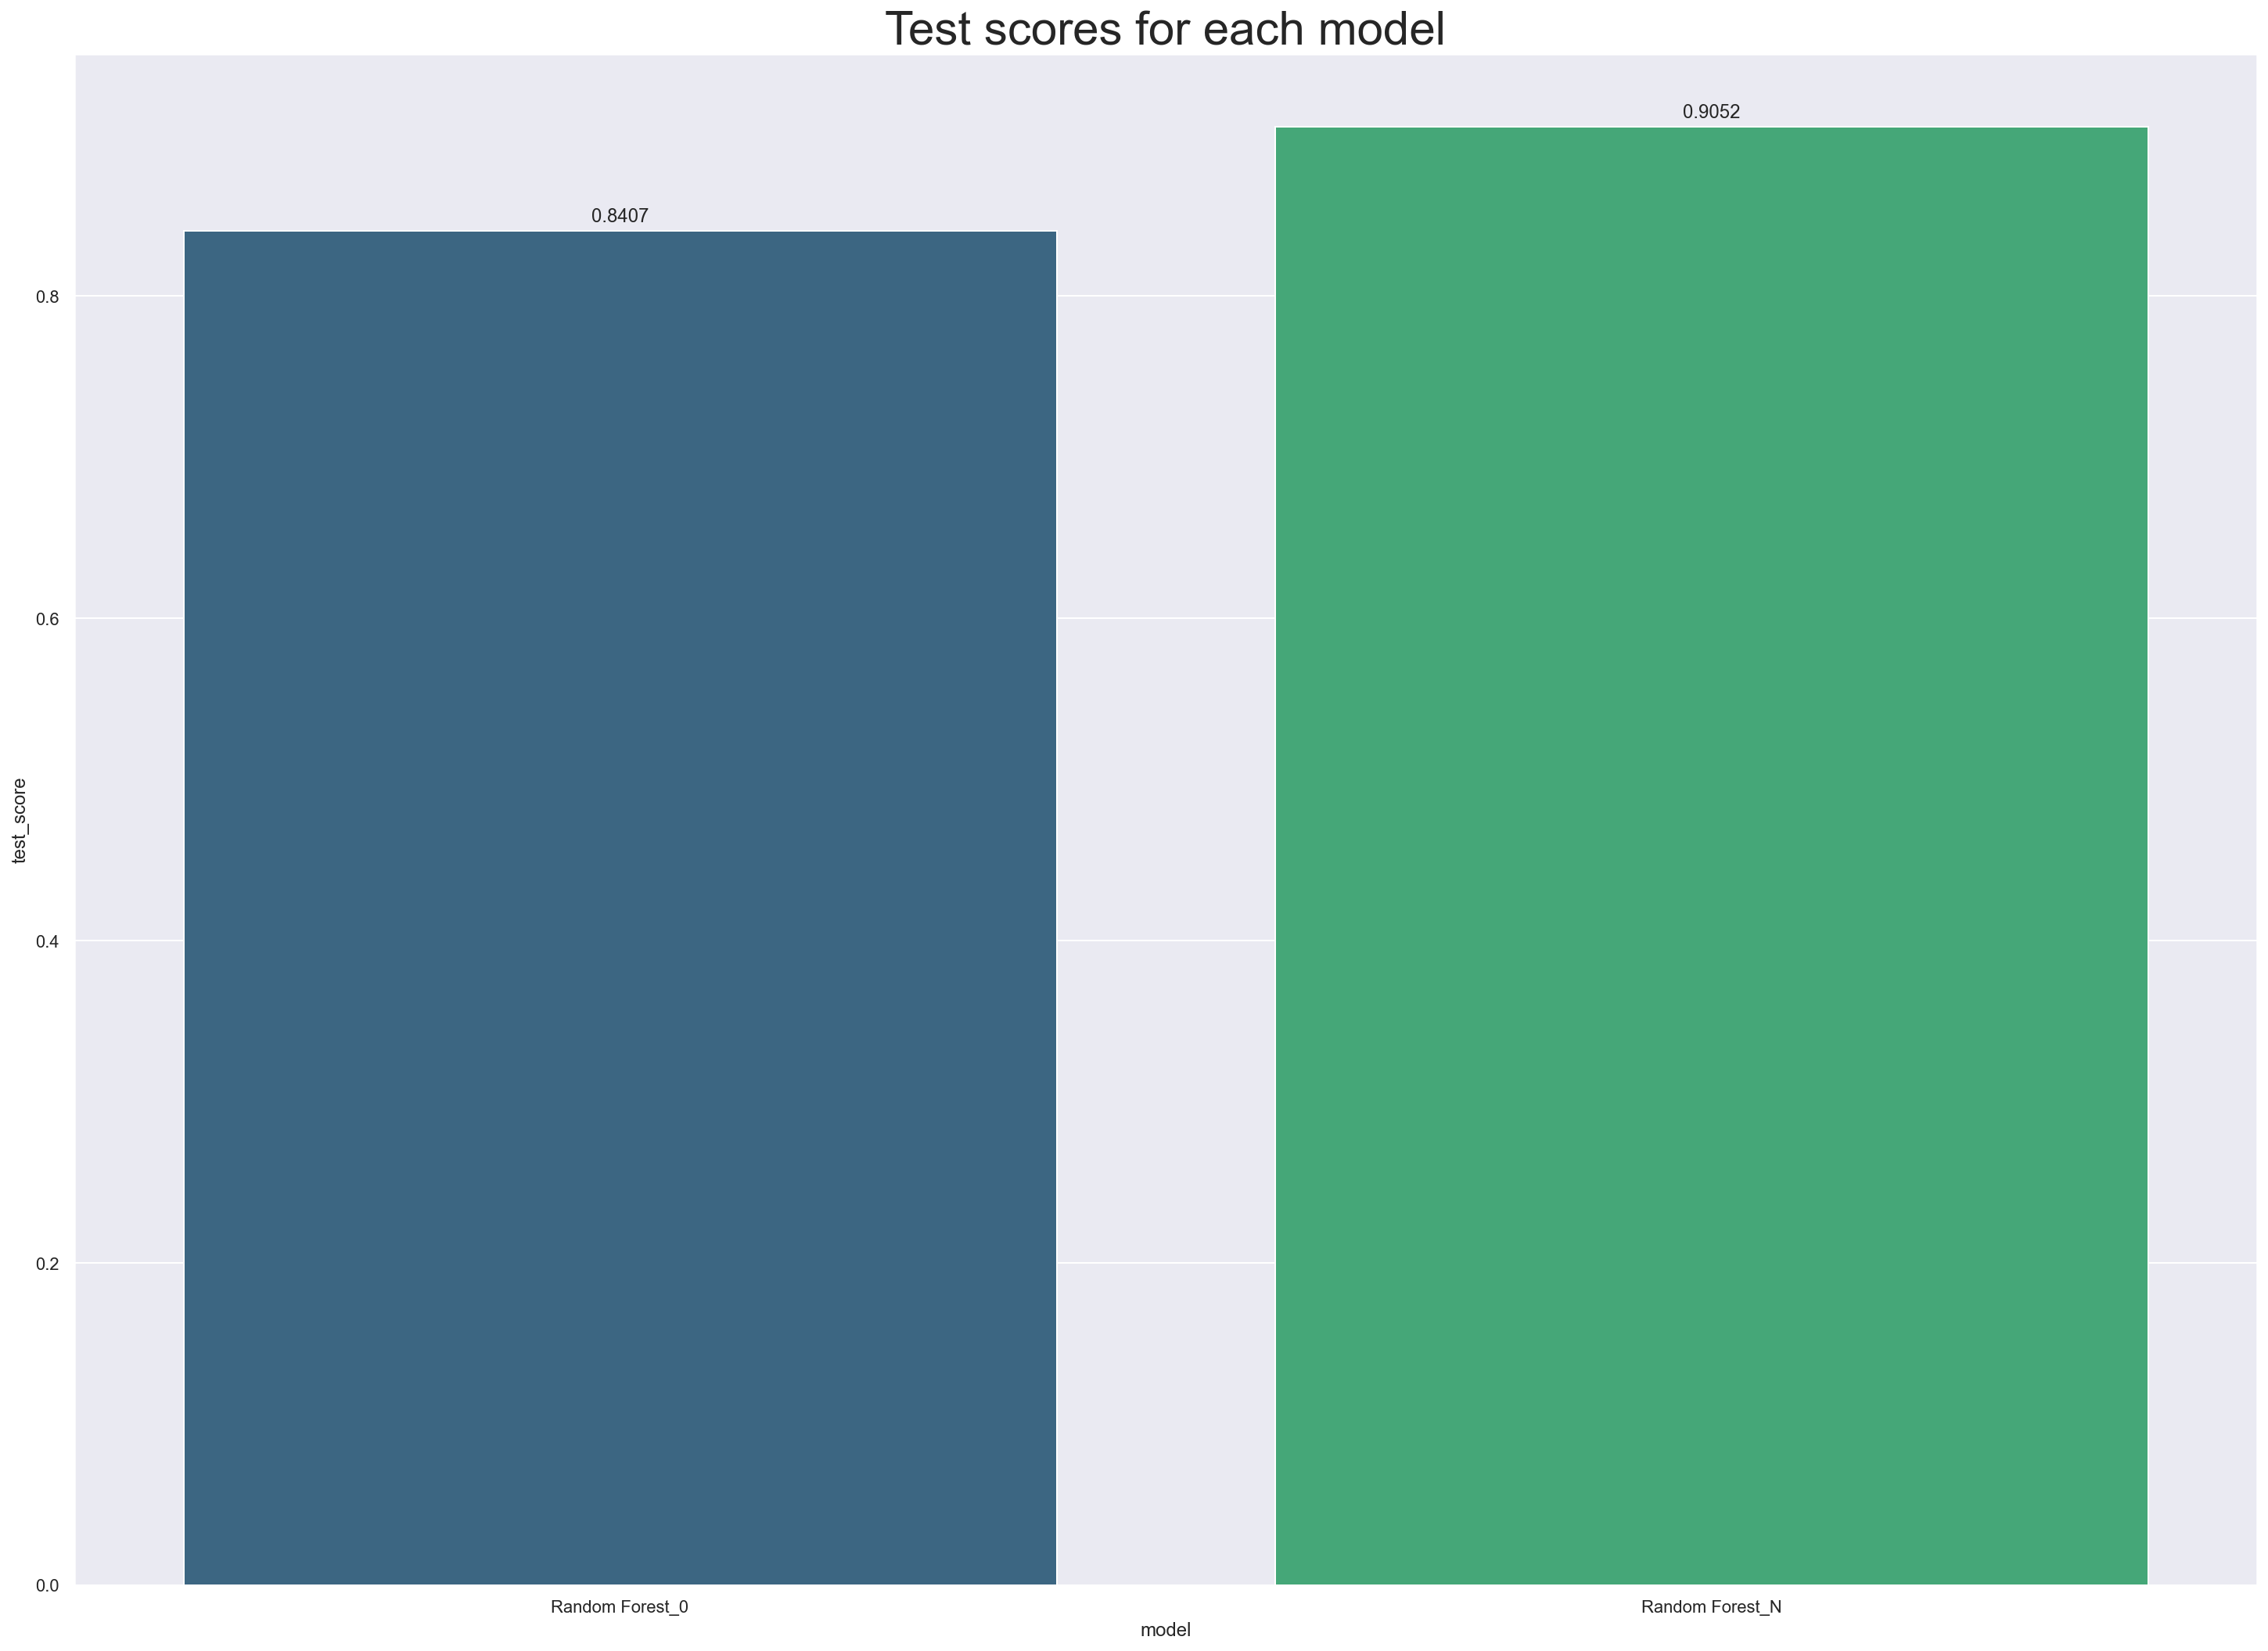

In [118]:
# Creating a boxplot to display the test score
sns.set(rc= {'figure.figsize':(25,18)})
ax = sns.barplot(x='model', y='test_score', data=lm_data, palette="viridis")

# Annotate Bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.axes.set_title("Test scores for each model", fontsize=30)
plt.show()

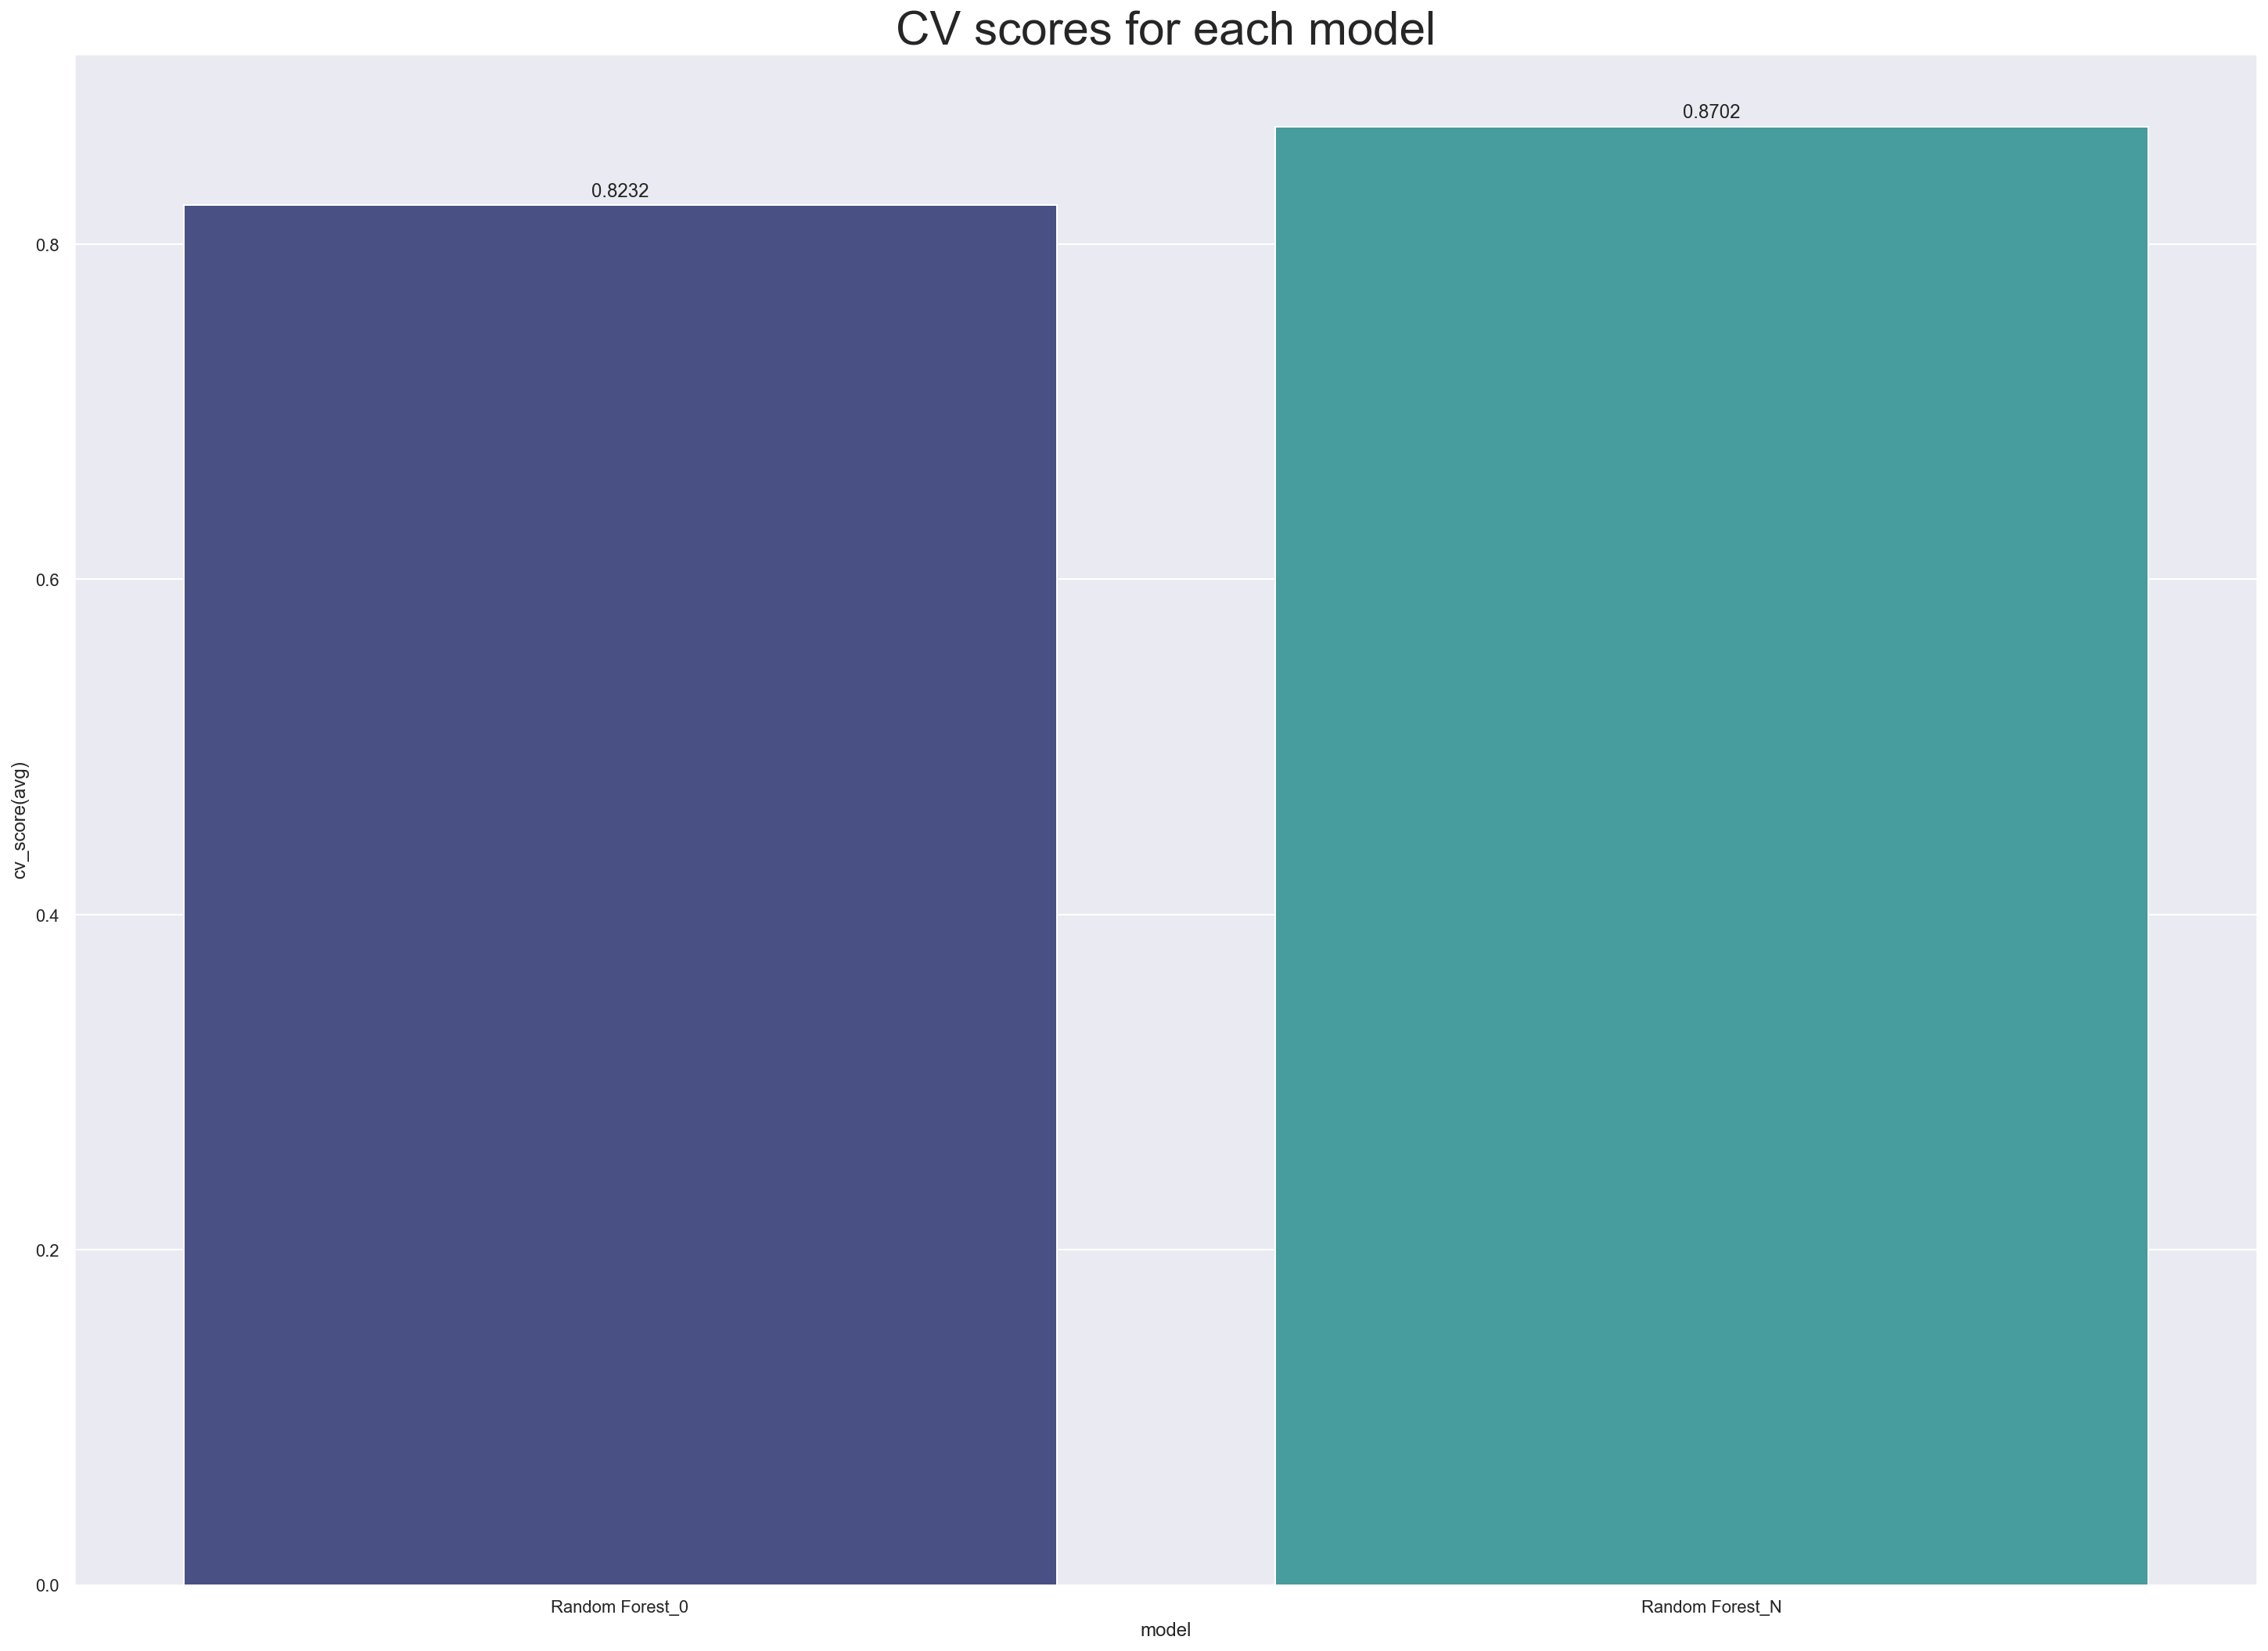

In [119]:
# Creating a boxplot to display the CV Score for each model
ax = sns.barplot(x='model', y='cv_score(avg)', data=lm_data, palette="mako")

# Annotate Bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.axes.set_title("CV scores for each model", fontsize=30)
plt.show()

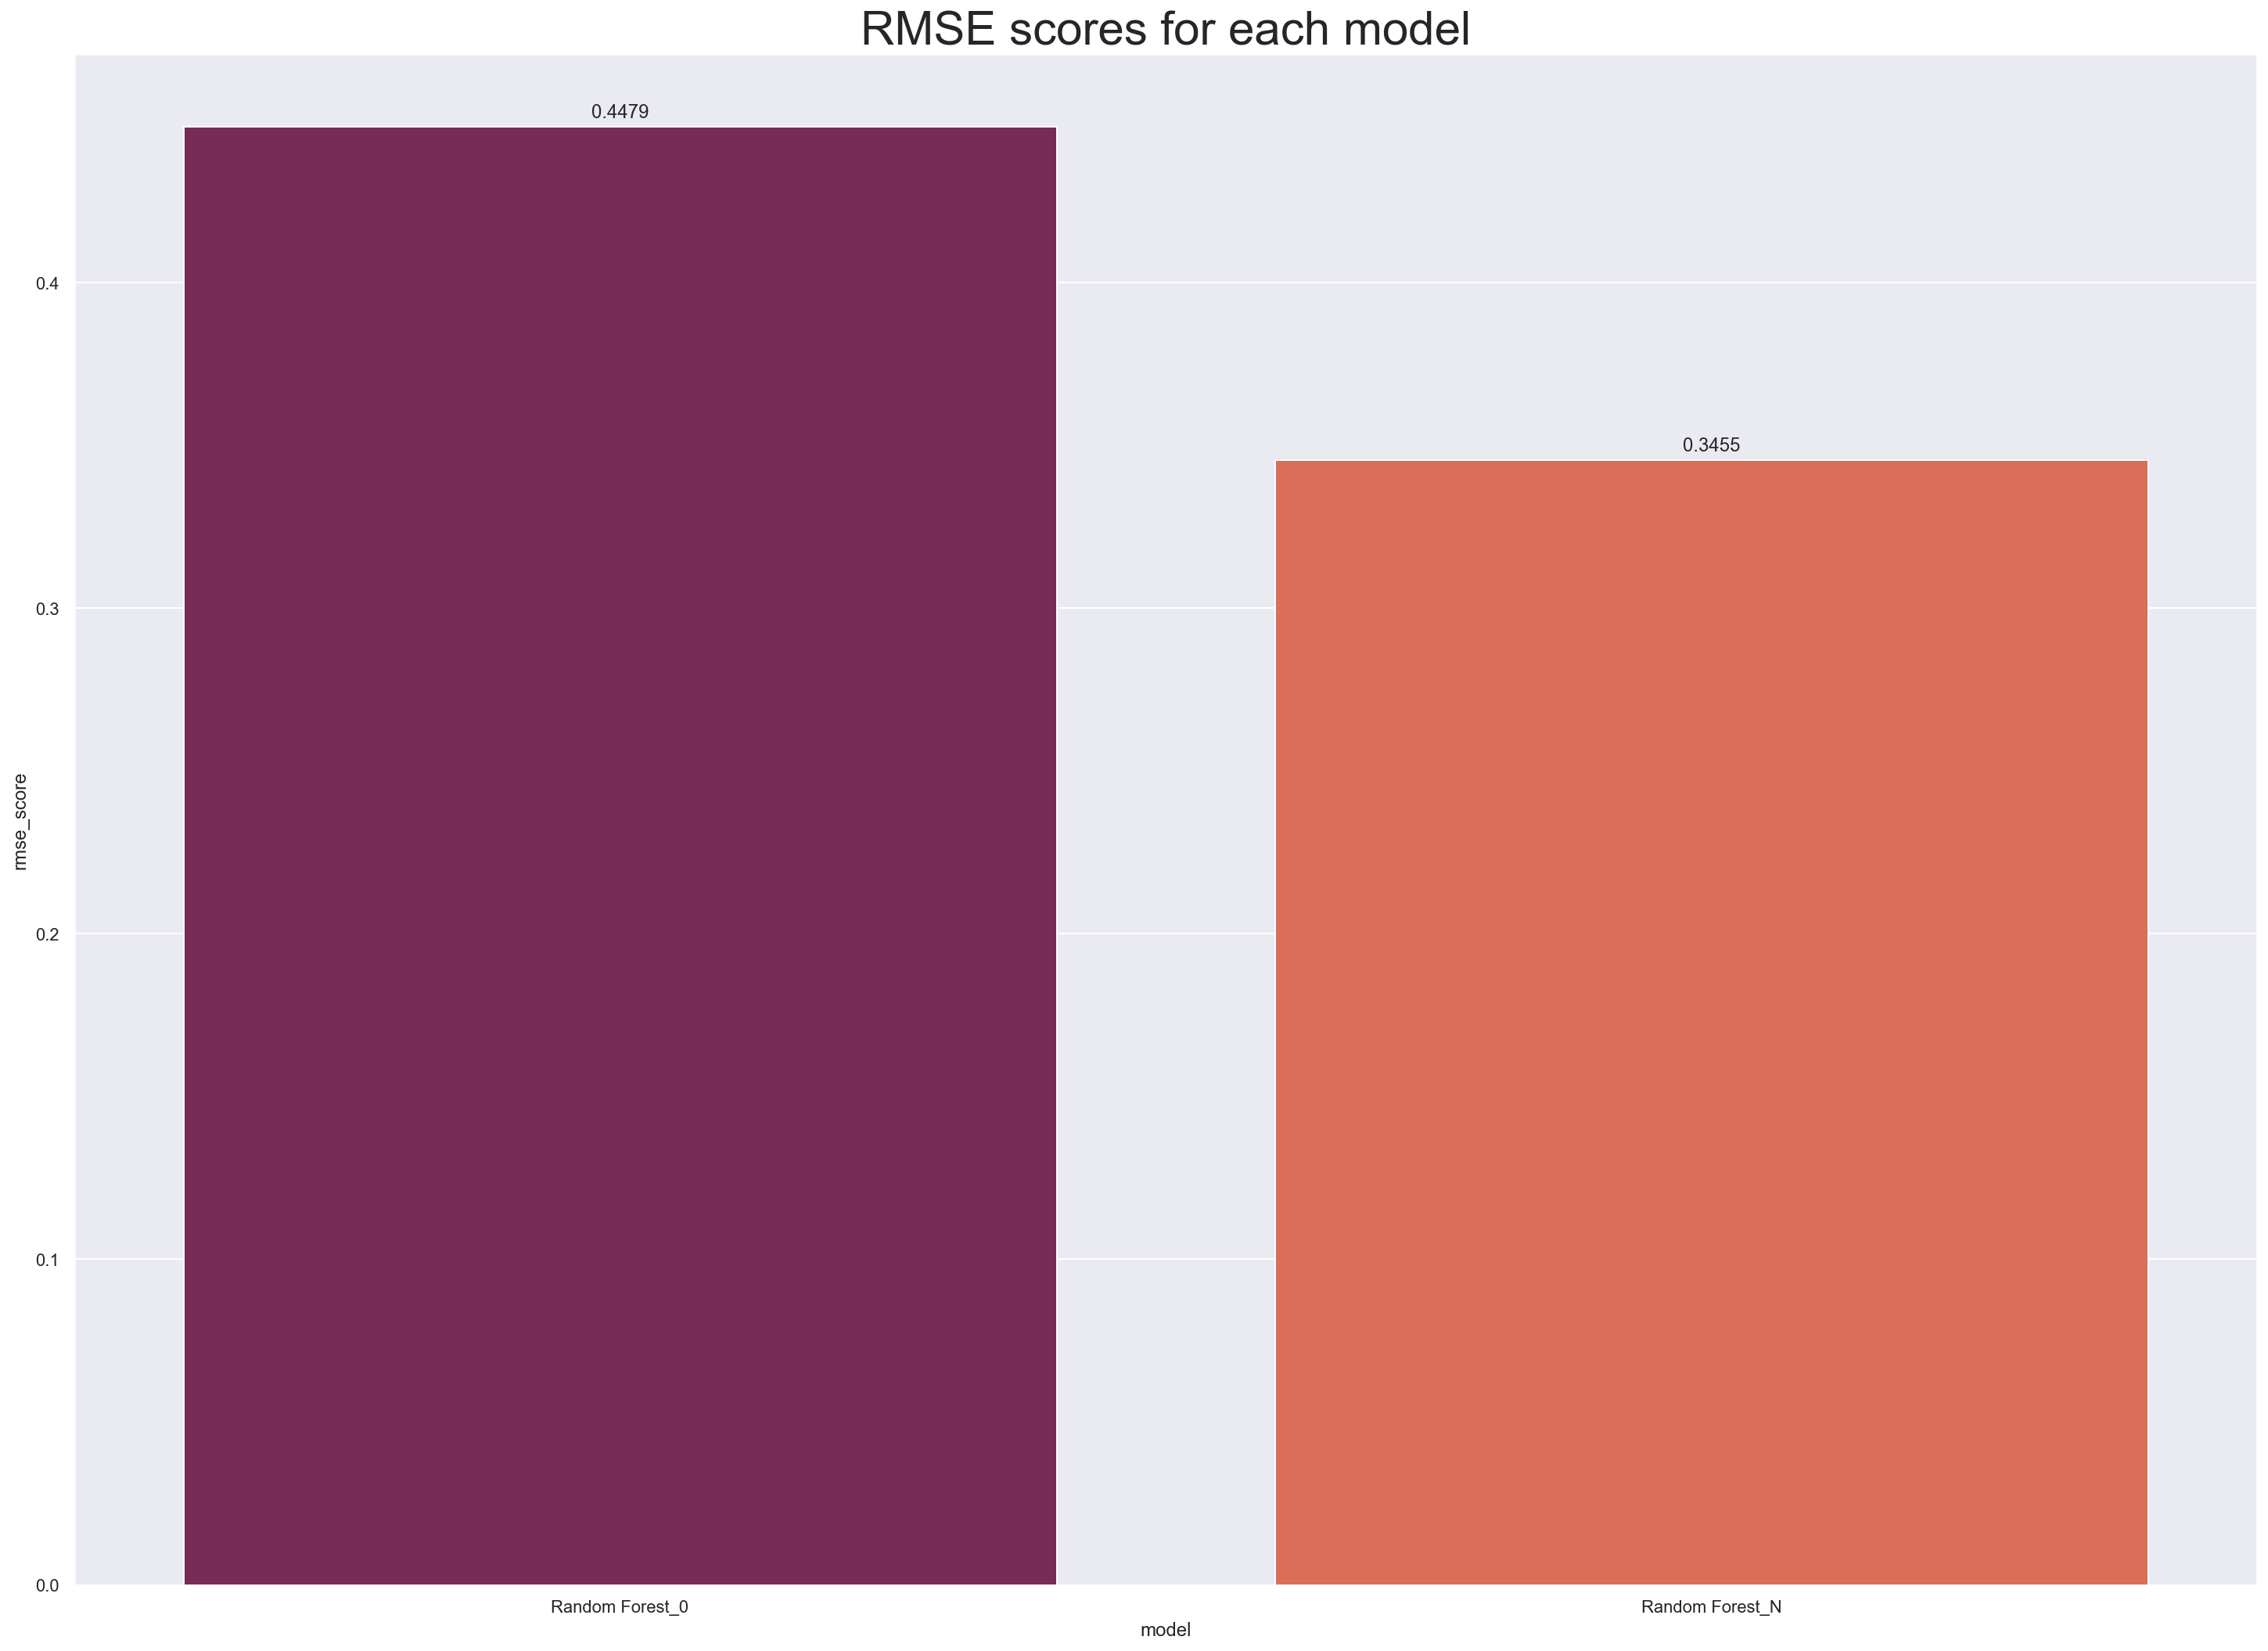

In [120]:
# Creating a boxplot to display the RMSE
sns.set(rc= {'figure.figsize':(25,18)})
ax = sns.barplot(x='model', y='rmse_score', data=lm_data, palette="rocket")

# Annotate Bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.axes.set_title("RMSE scores for each model", fontsize=30)
plt.show()

#### Investigating Feature Importances for Original and New Features

##### Original Features

In [121]:
orfr.feature_importances_

array([0.24, 0.37, 0.09, 0.05, 0.08, 0.12, 0.05])

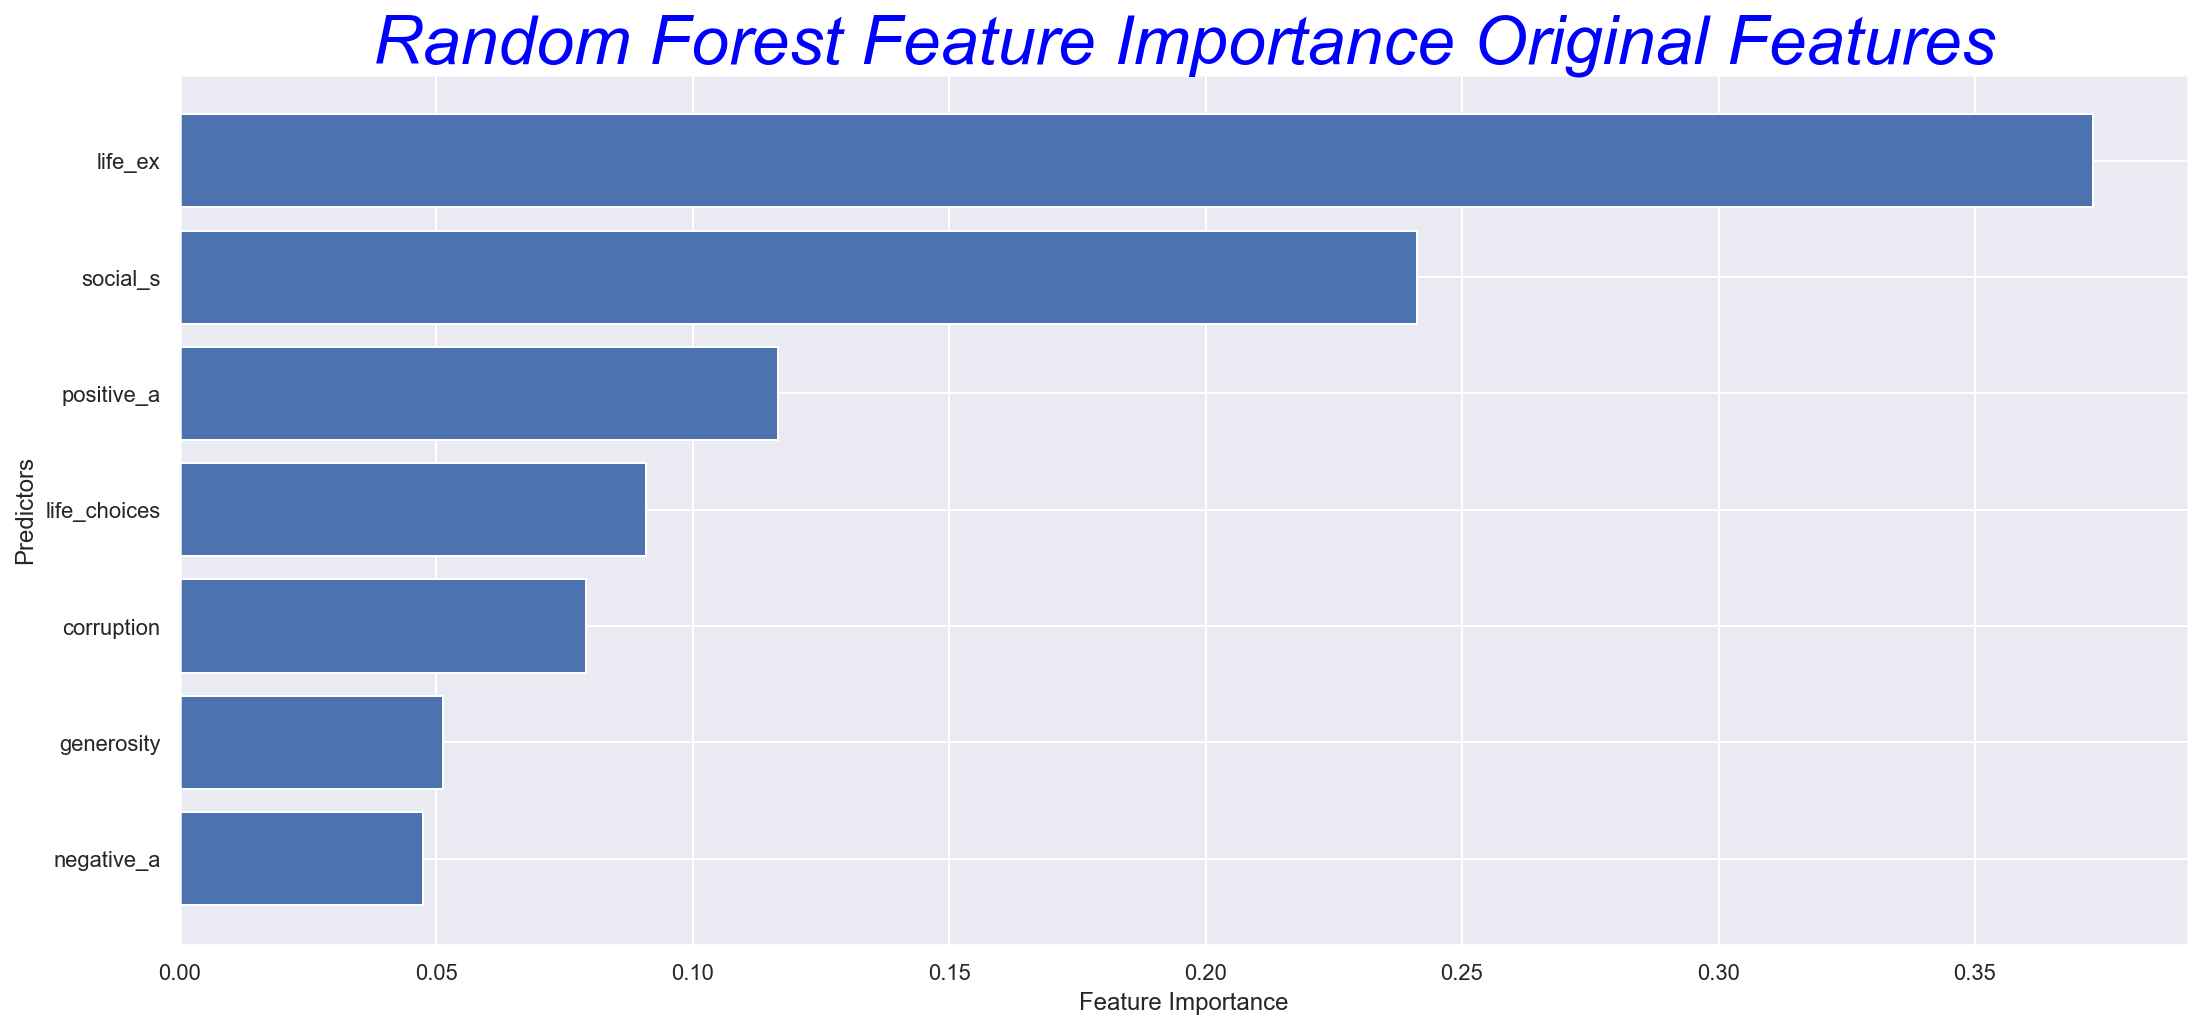

In [122]:
# Ordered bar chart with feature importances
sorted_idx = orfr.feature_importances_.argsort()

plt.figure(figsize=(18,8))
# Labelling chart
plt.title('Random Forest Feature Importance Original Features', fontsize = 34.0, color='Blue', fontstyle='italic')
plt.xlabel('Feature Importance')
plt.ylabel('Predictors')

plt.barh(of1.iloc[:, :-1].columns[sorted_idx], orfr.feature_importances_[sorted_idx]);

# Saving as image and pdf
plt.savefig('Random Forest Feature Importance Original Features.png',dpi=100)
plt.savefig('Random Forest Feature Importance Original Features.pdf')

In [123]:
# Creating a df with all features sorted by importance 
orf_data = list(zip(of1.iloc[:, :-1].columns, orfr.feature_importances_))
odf = pd.DataFrame(orf_data, columns =['Feature', 'Importance'])

# Sorting the dataframe by feature importance
odfs = odf.sort_values(by='Importance', ascending=False)
odfs['Cumulative'] = odfs['Importance'].cumsum()
odfs.reset_index(drop=True)

,Feature,Importance,Cumulative
0,life_ex,0.372966,0.372966
1,social_s,0.241247,0.614213
2,positive_a,0.116696,0.730909
3,life_choices,0.090951,0.821860
4,corruption,0.079303,0.901163
5,generosity,0.051418,0.952581
6,negative_a,0.047419,1.000000


##### New Features

In [124]:
nrfr.feature_importances_

array([0.09, 0.12, 0.16, 0.1 , 0.33, 0.21])

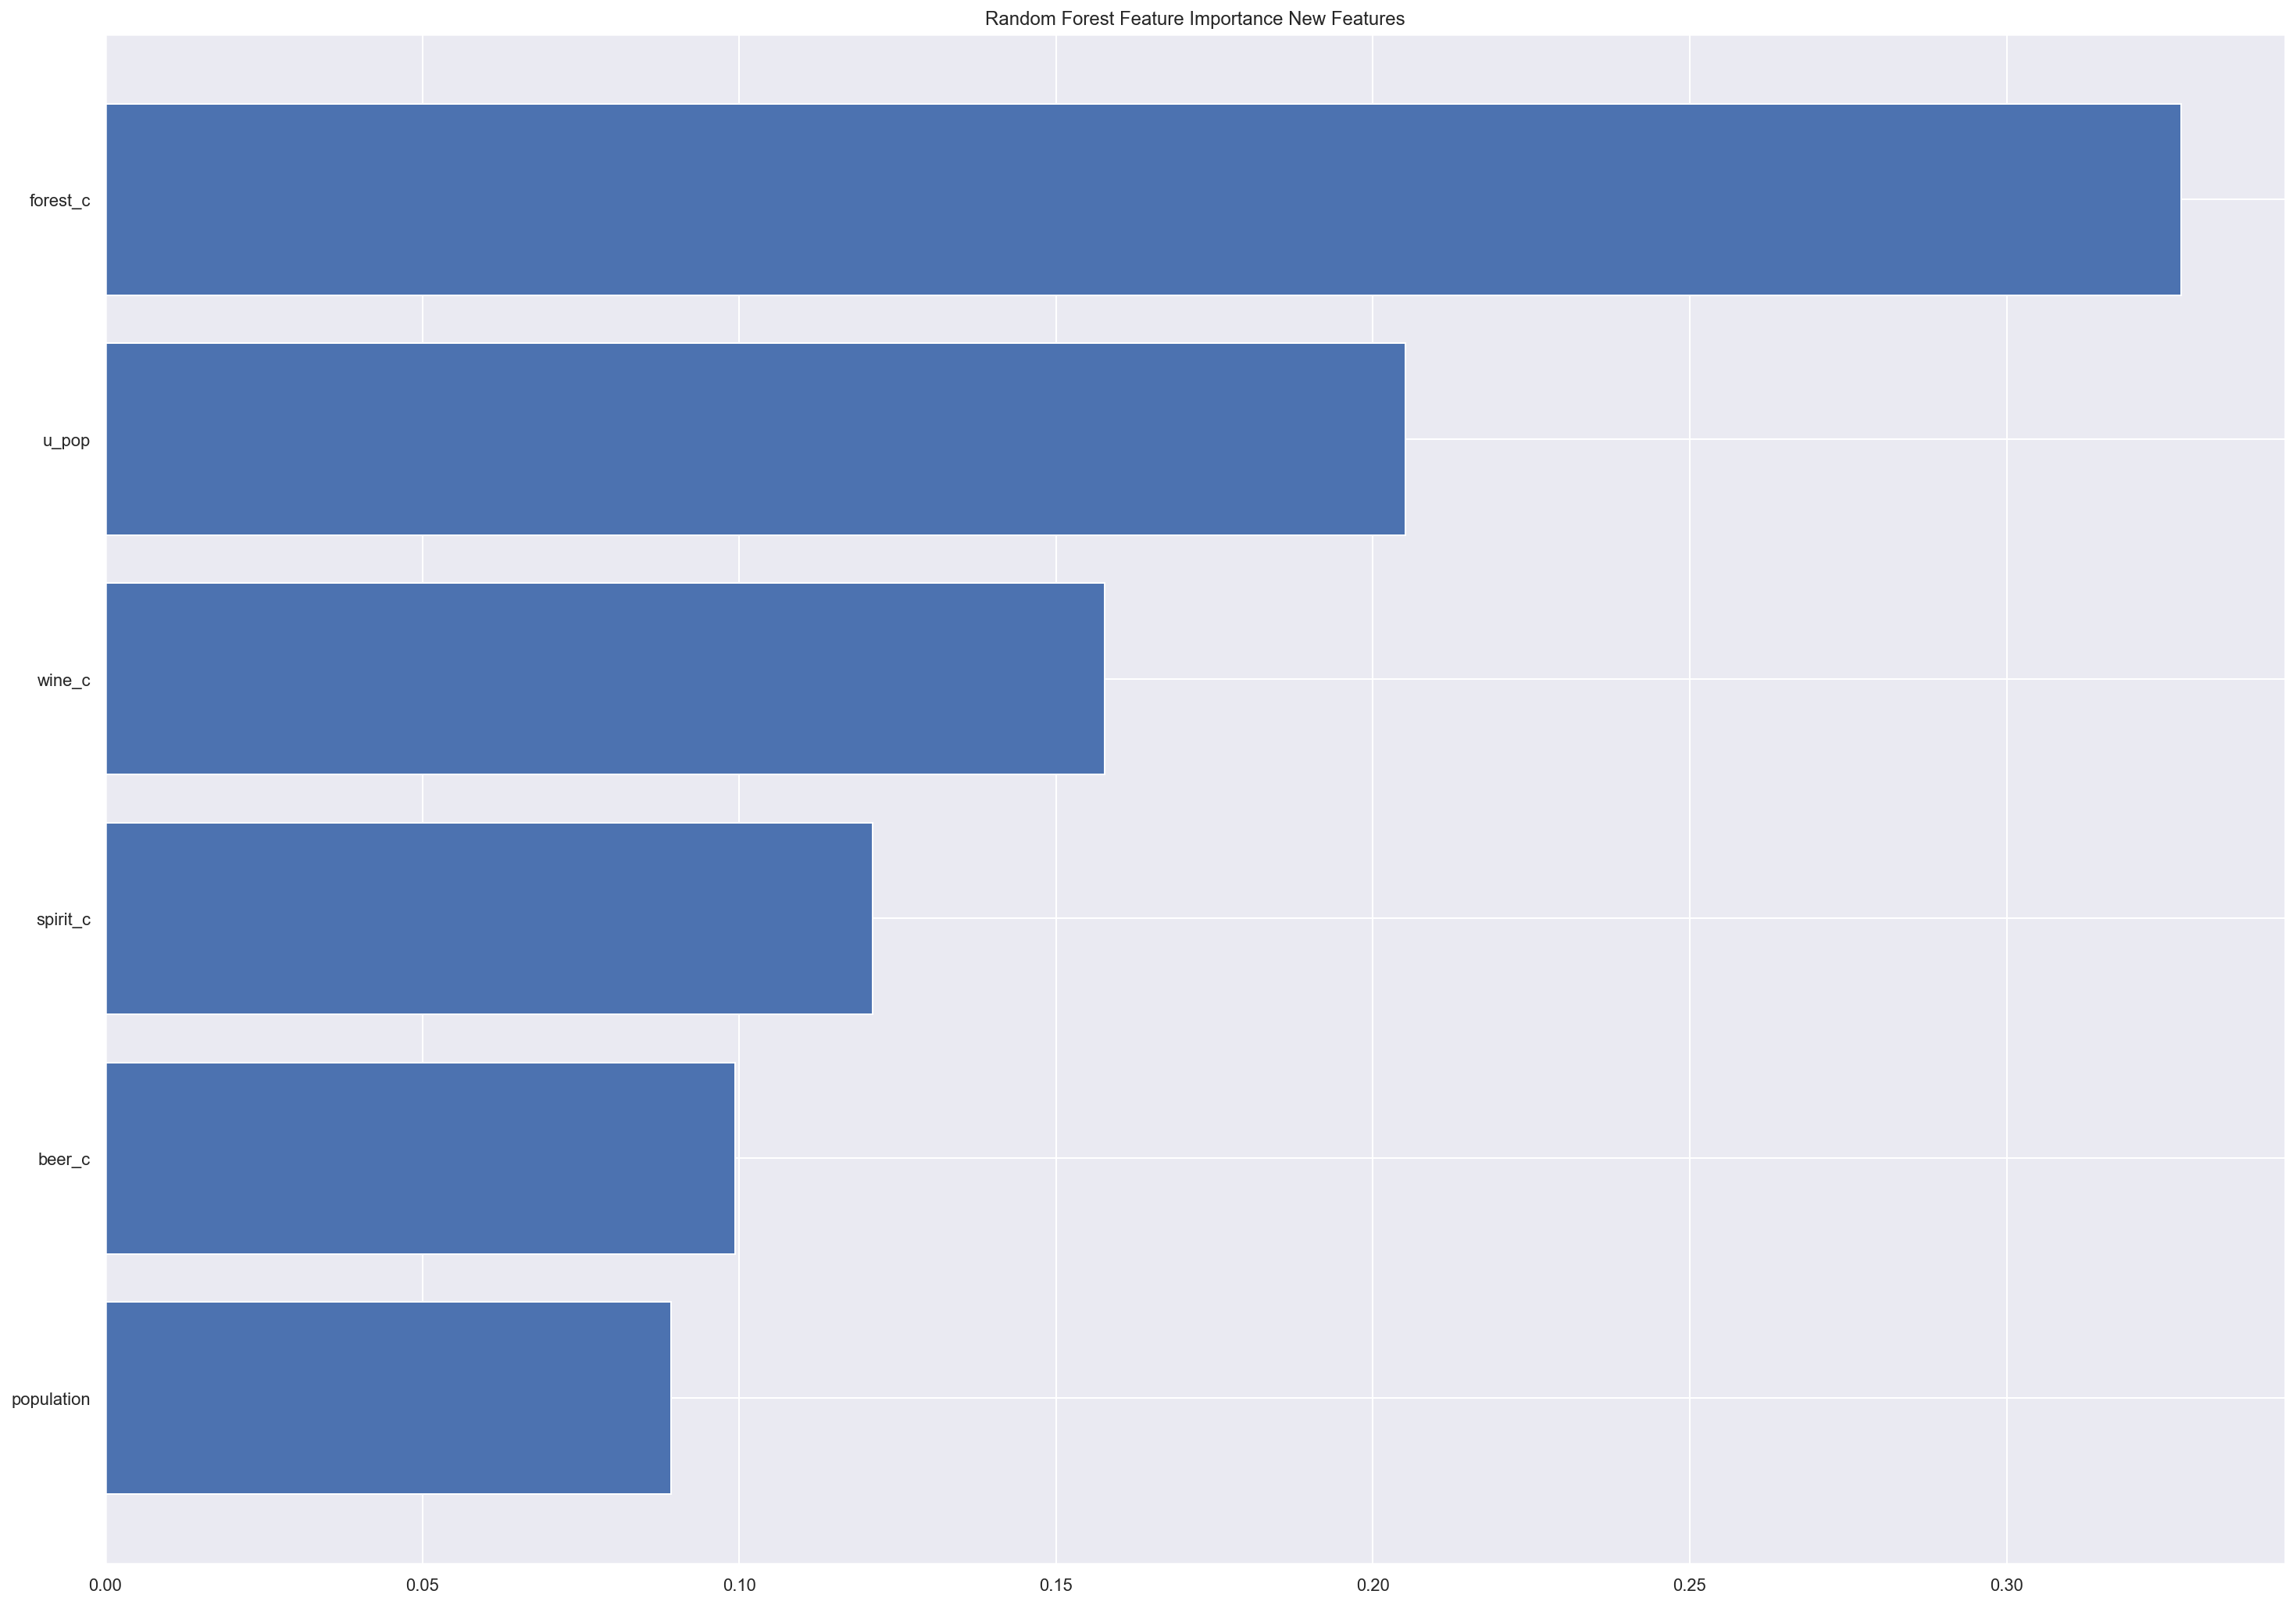

In [125]:
# Ordered bar chart with  new feature importances
sorted_idx = nrfr.feature_importances_.argsort()
plt.barh(nf.iloc[:, :-1].columns[sorted_idx], nrfr.feature_importances_[sorted_idx])
plt.title("Random Forest Feature Importance New Features");

In [126]:
# Creating a df with all features sorted by importance 
nrf_data = list(zip(nf1.iloc[:, :-1].columns, nrfr.feature_importances_))
ndf = pd.DataFrame(nrf_data, columns =['Feature', 'Importance'])

# Sorting the dataframe by feature importance
ndfs = ndf.sort_values(by='Importance', ascending=False)
ndfs['Cummulative'] = ndfs['Importance'].cumsum()
ndfs.reset_index(drop=True)

,Feature,Importance,Cummulative
0,u_pop,0.327560,0.327560
1,age_dr,0.205097,0.532658
2,wine_c,0.157694,0.690352
3,spirit_c,0.121023,0.811374
4,forest_c,0.099331,0.910705
5,population,0.089295,1.000000


##### Happiness Score Statistics

In [127]:
happy_df.happiness_s.describe()

count    1745.000000
mean        5.464703
std         1.128544
min         2.375000
25%         4.639000
50%         5.374000
75%         6.283000
max         8.019000
Name: happiness_s, dtype: float64

In [128]:
happy_df.columns

Index(['Unnamed: 0', 'year', 'log_gdp', 'social_s', 'life_ex', 'life_choices',
       'generosity', 'corruption', 'positive_a', 'negative_a', 'population',
       'spirit_c', 'wine_c', 'beer_c', 'forest_c', 'u_pop', 'age_dr',
       'happiness_s'],
      dtype='object')

In [129]:
'We need to merge the country column back into our dataframe.'
# Read in original CSV file downloaded from the internet
whr= pd.read_csv('whr.csv')

In [130]:
whr.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [131]:
# Rename Life Ladder to happiness_s
whr.rename(columns = {'Life Ladder':'happiness_s'}, inplace = True)

In [132]:
whr.shape, happy_df.shape

((1949, 11), (1745, 18))

In [133]:
# Making copies to protect original dataframes
happy_start = whr.copy()
happy_final = happy_df.copy()

In [134]:
# Merging dfs
happy_conc = happy_final.merge(happy_start, on=['year','happiness_s'])

In [135]:
happy_conc.shape

(1805, 27)

In [136]:
# Observation for one of the most recent years
y2019 = happy_df[happy_df.eq(2019).sum(axis=1).eq(1)]
len(y2019)

136

#### Creating data frames for top 68 and bottom 68 observations

In [137]:
# Creating a list with top68 and bottom 68 values of happiness
top68h = happy_df.happiness_s.sort_values(ascending=False
                                         ).head(68).tolist()
bottom68h = happy_df.happiness_s.sort_values(ascending=True
                                            ).head(68).tolist()

In [138]:
# Creating a df with top68 observations only
df_top68 = happy_conc[happy_conc['happiness_s'].isin(
    top68h)].reset_index(drop=True)
df_top68[['Country name','happiness_s']].sort_values(by='happiness_s',
                                                    ascending=False)

,Country name,happiness_s
9,Denmark,8.019
11,Denmark,7.971
29,Finland,7.858
10,Denmark,7.834
28,Finland,7.788
...,...,...
0,Australia,7.450
26,Finland,7.448
25,Finland,7.445
54,Norway,7.444


In [139]:
df_top68['Country name'].nunique()

15

In [140]:
df_68t = df_top68.groupby('Country name').nunique()
df_68t.sample()

,Unnamed: 0,year,log_gdp,social_s,life_ex,life_choices,generosity,corruption,positive_a,negative_a,...,age_dr,happiness_s,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,,,,,,,,,,,,,,
Denmark,14,14,13,11,14,13,14,12,13,13,...,14,14,13,11,14,13,13,12,13,13


In [141]:
# Sorting above results in descending order by best happiness score
dft68s = df_68t['happiness_s'].sort_values(ascending=False)
# Creating a dictionary
dict_68t = dft68s.to_dict()
dict_68t

{'Denmark': 14,
 'Netherlands': 9,
 'Switzerland': 9,
 'Finland': 8,
 'Iceland': 6,
 'Norway': 6,
 'Canada': 5,
 'Sweden': 3,
 'Austria': 2,
 'Australia': 1,
 'Costa Rica': 1,
 'Ireland': 1,
 'New Zealand': 1,
 'United States': 1,
 'Venezuela': 1}

In [142]:
n_by_top68 = df_top68.groupby('Country name')['happiness_s'].count()
n_by_top68.sort_values(ascending=False)

Country name
Denmark          14
Netherlands       9
Switzerland       9
Finland           8
Norway            7
Iceland           6
Canada            5
Sweden            3
Austria           2
Australia         1
Costa Rica        1
Ireland           1
New Zealand       1
United States     1
Venezuela         1
Name: happiness_s, dtype: int64

In [143]:
df_top68['Country name'].nunique()

15

In [144]:
# Import WordCloud to create a word cloud of the countries
from wordcloud import WordCloud
wct = WordCloud(width=800, height=400, background_color='white',
               max_words=200).generate_from_frequencies(dict_68t)

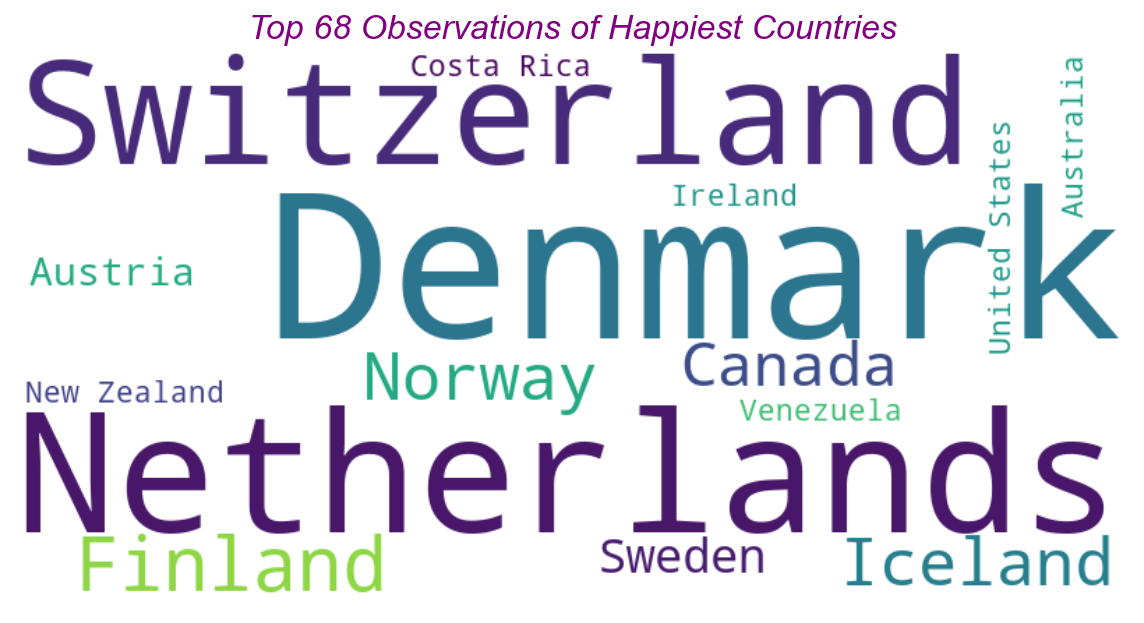

In [145]:
# Ordered bar chart with feature importances
sorted_idx = orfr.feature_importances_.argsort()

plt.figure(figsize=(10,10))
# Labelling chart
plt.title('Top 68 Observations of Happiest Countries', fontsize = 17.0, color='Purple', fontstyle='italic')

plt.imshow(wct, interpolation='bilinear')
plt.axis('off')
plt.show();

# Saving as image and pdf
##wct.to_file('68_Happiest_Observations.png')

In [146]:
# Creating a df with bottom68 observations only
df_bot68 = happy_conc[happy_conc['happiness_s'].isin(
    bottom68h)].reset_index(drop=True)
df_bot68[['Country name','happiness_s']].sort_values(by='happiness_s',
                                                    ascending=True)

,Country name,happiness_s
3,Afghanistan,2.375
1,Afghanistan,2.662
49,Syria,2.688
20,Central African Republic,2.693
67,Zimbabwe,2.694
...,...,...
44,Rwanda,3.561
16,Burundi,3.563
19,Central African Republic,3.568
18,Cambodia,3.569


In [147]:
df_68b = df_bot68.groupby('Country name').nunique()
df_68b

,Unnamed: 0,year,log_gdp,social_s,life_ex,life_choices,generosity,corruption,positive_a,negative_a,...,age_dr,happiness_s,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,4,4,3,4,4,4,4,4,4,4,...,4,4,3,4,4,4,4,4,4,4
Benin,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Botswana,6,6,6,5,6,6,6,6,6,6,...,6,6,6,5,6,6,6,6,6,6
Burkina Faso,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Burundi,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Cambodia,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
Central African Republic,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Chad,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Comoros,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [148]:
# Sorting above result in descending order by worst happiness score
df68s = df_68b['happiness_s'].sort_values(ascending=False)
# Creating a dictionary
dict_68b = df68s.to_dict()

In [149]:
wc = WordCloud(width=800, height=400, background_color='white',
               max_words=200).generate_from_frequencies(dict_68b)

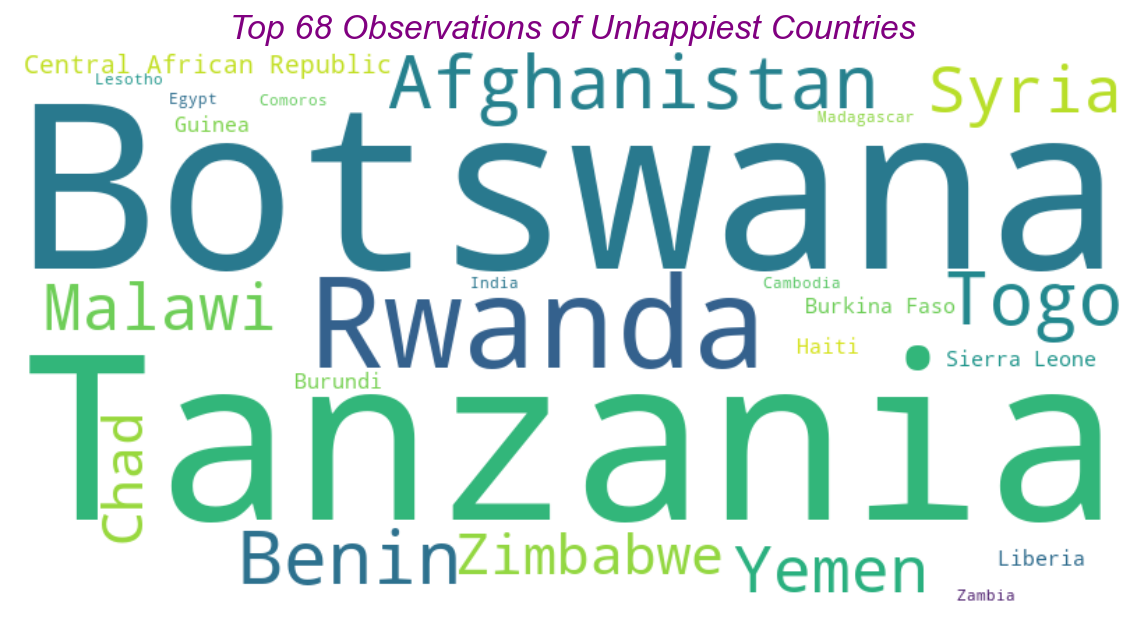

In [150]:
plt.figure(figsize=(10, 10))
# Labelling chart
plt.title('Top 68 Observations of Unhappiest Countries', fontsize = 17.0, color='Purple', fontstyle='italic')

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show();

# Saving as image and pdf
## wc.to_file('68_Unhappiest_Observations.png')

In [151]:
dict_68b

{'Botswana': 6,
 'Tanzania': 6,
 'Rwanda': 6,
 'Afghanistan': 4,
 'Benin': 4,
 'Togo': 4,
 'Yemen': 3,
 'Syria': 3,
 'Malawi': 3,
 'Zimbabwe': 3,
 'Chad': 3,
 'Central African Republic': 3,
 'Guinea': 2,
 'Haiti': 2,
 'Liberia': 2,
 'Sierra Leone': 2,
 'Burundi': 2,
 'Burkina Faso': 2,
 'Egypt': 1,
 'Lesotho': 1,
 'Madagascar': 1,
 'Comoros': 1,
 'Cambodia': 1,
 'Zambia': 1,
 'India': 1}

In [152]:
df_bot68['Country name'].nunique()

25

In [153]:
happy_df.happiness_s.describe()

count    1745.000000
mean        5.464703
std         1.128544
min         2.375000
25%         4.639000
50%         5.374000
75%         6.283000
max         8.019000
Name: happiness_s, dtype: float64

### Conclusion

For both original and newly collected data, the top three features explain around 70% of the variance in the target variable. 
The Model using the quantitative data delivers a substantially higher R2 test scores while conversely the RMSE score is substantially lower.